# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

The used car market in India has surpassed the new car market in terms of volume, indicating a significant shift in consumer behavior. However, unlike the new car market, pricing in the used car segment is highly uncertain due to many influencing factors (e.g., mileage, brand, year).

For both buyers and sellers, this pricing ambiguity creates inefficiencies, lack of trust, and potential financial losses. Solving this problem is crucial because:

- It brings transparency and consistency to pricing.

- It helps sellers price their cars more accurately, boosting conversions.

- It enables startups like Cars4U to compete effectively by offering smart, data-backed pricing models, gaining consumer confidence and market share

### **The objective:**

The intended goal is to build a data-driven pricing model that:

- Accurately predicts the price of used cars based on key features (e.g., brand, model, year, mileage).

- Supports differential pricing strategies to maximize profit margins.

- Empowers the business to scale by making pricing decisions more efficient, consistent, and profitable.

### **The key questions:**

To build an effective pricing model, several key questions must be addressed:

- Which factors most influence the price of a used car?

- How do different features (e.g., brand, year, mileage, fuel type) correlate with price?

- Can we build a model that generalizes well across different locations and car types?

- How accurate is our pricing model compared to actual market prices?

- Can the model help identify undervalued or overvalued cars for strategic pricing?

### **The problem formulation**:

Using data science, we aim to predict the fair market price of a used car based on its attributes. Specifically, we want to:

- Develop a regression-based machine learning model that learns from historical data.

- Reduce pricing subjectivity and reliance on manual appraisals.

- Use the model to optimize pricing strategies and improve business decisions.

- Ultimately, increase customer trust and profitability by ensuring fair, data-backed pricing.



### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split the data
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

#Formats the decimal point to 3
pd.set_option('display.float_format', '{:.3f}'.format)

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Standard Scaler
from sklearn.preprocessing import StandardScaler

# Import library for preparing data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error


import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Before loading the dataset, lets mount the file to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Let us load the data**

In [ ]:
#load the source data from google drive for analysis
used_car_df = pd.read_csv("/content/drive/MyDrive/MIT-Capstone/used_cars.csv")

In [ ]:
# view the first 5 rows of the data set
used_car_df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.600,998.000,58.160,5.000,NaN,1.750
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.000,126.200,5.000,NaN,12.500
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.000,8.610,4.500
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.000,88.760,7.000,NaN,6.000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,NaN,17.740


In [ ]:
# view the last 5 rows of the data set
used_car_df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.540,1598.000,103.600,5.000,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.210,1197.000,103.600,5.000,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.080,1461.000,63.100,5.000,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.200,1197.000,103.600,5.000,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.000,2148.000,170.000,5.000,NaN,NaN


## Data Overview

- Observations
- Sanity checks

In [ ]:
#get the shape of the data
used_car_df.shape

(7253, 14)

In [ ]:
# get the overview of the data frame. this will provide the details about the number of columns, rows and datatype
used_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [ ]:
#check for null/missing values in the data set. If there is any missing values, that needs to be fixed before proceeding with further analysis
used_car_df.isnull().sum() # we can use this one too used_car_df.isna().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


In [ ]:
# get the percetange of null values of each features
(used_car_df.isnull().sum() / used_car_df.shape[0])*100

,0
S.No.,0.000
Name,0.000
Location,0.000
Year,0.000
Kilometers_Driven,0.000
Fuel_Type,0.000
Transmission,0.000
Owner_Type,0.000
Mileage,0.028
Engine,0.634


In [ ]:
#check if there is any duplicate values
used_car_df.duplicated().sum()

np.int64(0)

**Observations:**
- The dataset contains 7253 rows and 14 columns.
- The columns include a mix of numerical (int64 and float64) and categorical (object) data types.
- There are no duplicate rows in the dataset.
- Several columns have missing values:

    *   Mileage: 2 missing values (0.028%)
    * Engine: 46 missing values (0.634%)
    * Power: 175 missing values (2.413%)
    * Seats: 53 missing values (0.731%)
    * New_price: 6247 missing values (86.130%)
    * Price: 1234 missing values (17.014%)
- The S.No., Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, and Owner_Type columns have no missing values.
- The New_price column has a very high percentage of missing values (over 86%), which might make it difficult to use directly in modeling.
- The target variable Price also has a significant number of missing values (17.014%), which will need to be addressed before modeling.

## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [ ]:
# Summary statistics for numerical columns
display(used_car_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.000,3626.000,2093.905,0.000,1813.000,3626.000,5439.000,7252.000
Year,7253.000,2013.365,3.254,1996.000,2011.000,2014.000,2016.000,2019.000
Kilometers_Driven,7253.000,58699.063,84427.721,171.000,34000.000,53416.000,73000.000,6500000.000
Mileage,7251.000,18.142,4.562,0.000,15.170,18.160,21.100,33.540
Engine,7207.000,1616.573,595.285,72.000,1198.000,1493.000,1968.000,5998.000
Power,7078.000,112.765,53.494,34.200,75.000,94.000,138.100,616.000
Seats,7200.000,5.280,0.809,2.000,5.000,5.000,5.000,10.000
New_price,1006.000,22.780,27.759,3.910,7.885,11.570,26.043,375.000
Price,6019.000,9.479,11.188,0.440,3.500,5.640,9.950,160.000


In [ ]:
# Summary statistics for categorical columns
display(used_car_df.describe(include='object'))

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253,7253
unique,2041,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,949,3852,5204,5952


**Numerical Summary Statistics:**

- Kilometers_Driven: The maximum value is significantly higher than the 75th percentile, suggesting the presence of outliers with very high mileage.

- Mileage, Engine, Power, Seats: These columns have a small number of missing values, as indicated by the count being slightly less than the total number of rows. The minimum values for Mileage, Engine, and Power seem reasonable. The minimum for Seats is 2, which is also plausible.

- New_price: This column has a very low count compared to the total number of rows, confirming the high percentage of missing values we saw earlier. The range of prices is quite wide.

- Price: Our target variable also has a significant number of missing values. The range of prices shows a considerable variation in used car prices.

**Categorical Summary Statistics:**

- Name: There is a large number of unique car names (2041), which means we might need to extract more general information like the car brand for modeling purposes, as suggested in the notebook's feature engineering section.

- Location: There are 11 unique locations, with Mumbai being the most frequent.

- Fuel_Type: Diesel is the most common fuel type, followed by Petrol. There are also cars with CNG, LPG, and Electric fuel types, but in much smaller numbers.

- Transmission: Manual transmission is significantly more common than Automatic.

- Owner_Type: The vast majority of cars are First owner vehicles, with fewer Second, Third, and Fourth & Above owners.

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

**Categorical Columns:**

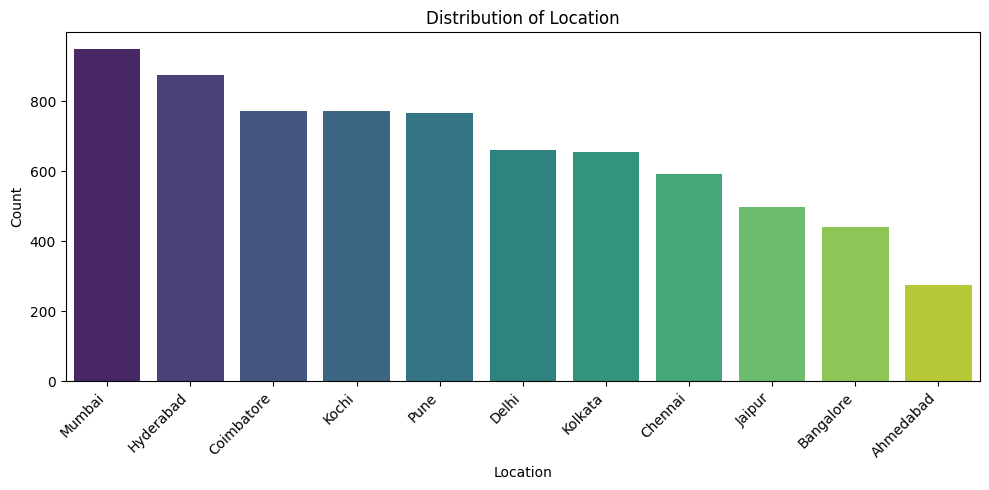

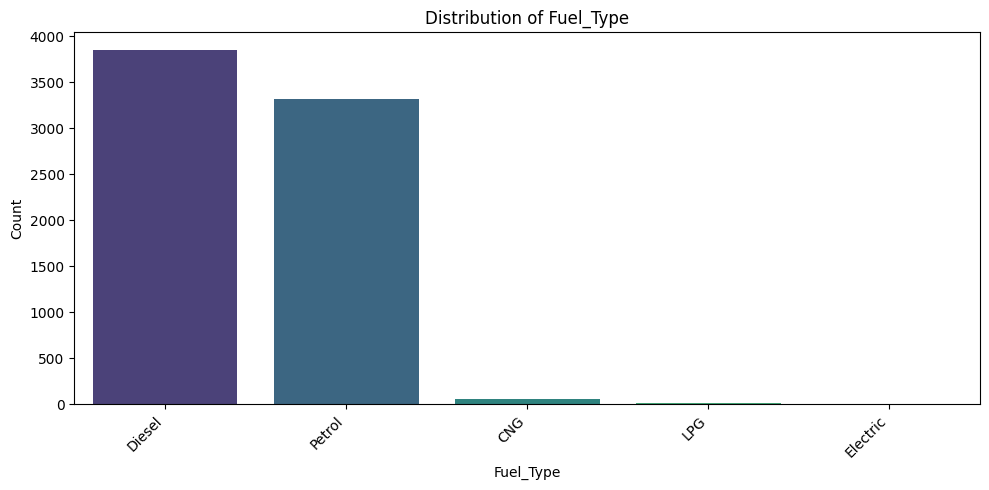

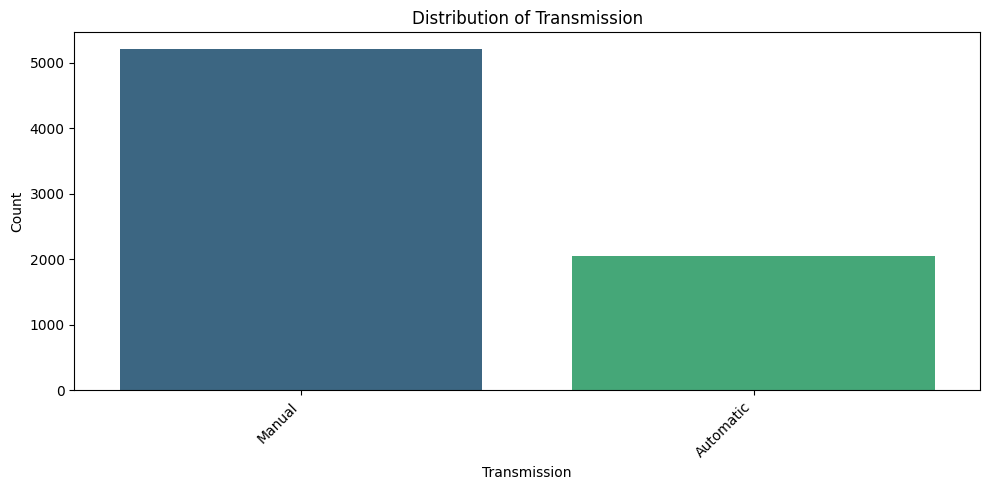

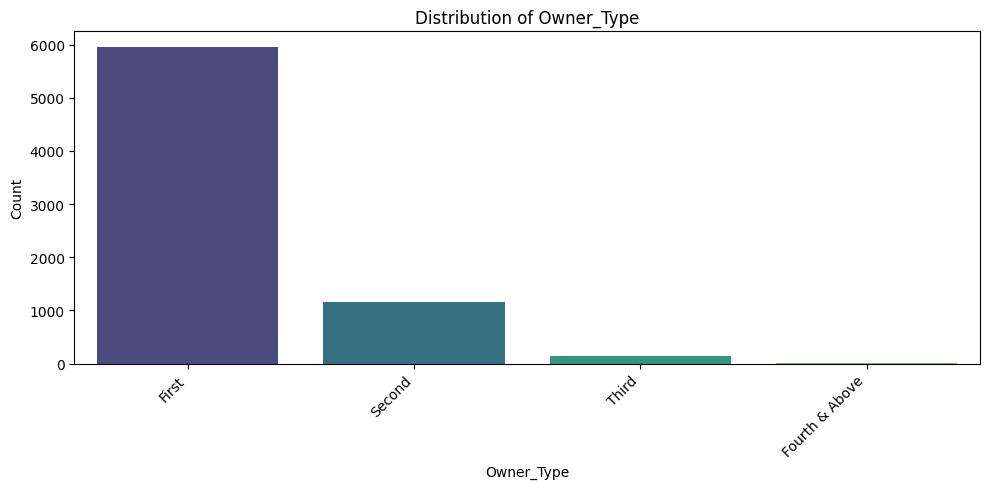

In [ ]:
# "Name" column is excluded due to its large number of unique values.
categorical_cols = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=used_car_df, x=col, order=used_car_df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Observations:**

- The distribution of cars across different locations is not uniform. Mumbai has the highest number of cars, followed by Hyderabad and Coimbatore. Ahmedabad has the fewest cars in the dataset. This suggests that location might be an important factor influencing car availability and potentially pricing.

- Diesel cars are the most prevalent in the dataset, followed by Petrol cars. CNG, LPG, and Electric cars are significantly less common. This reflects the dominant fuel types in the used car market represented by this dataset.

- Manual transmission cars are much more common than Automatic transmission cars. This indicates a higher supply and demand for manual cars in this market.

- The majority of cars are First Owner vehicles. The number of Second, Third, and Fourth & Above owner cars decreases significantly. This is expected, as cars typically change ownership fewer times.

**Numerical columns:**

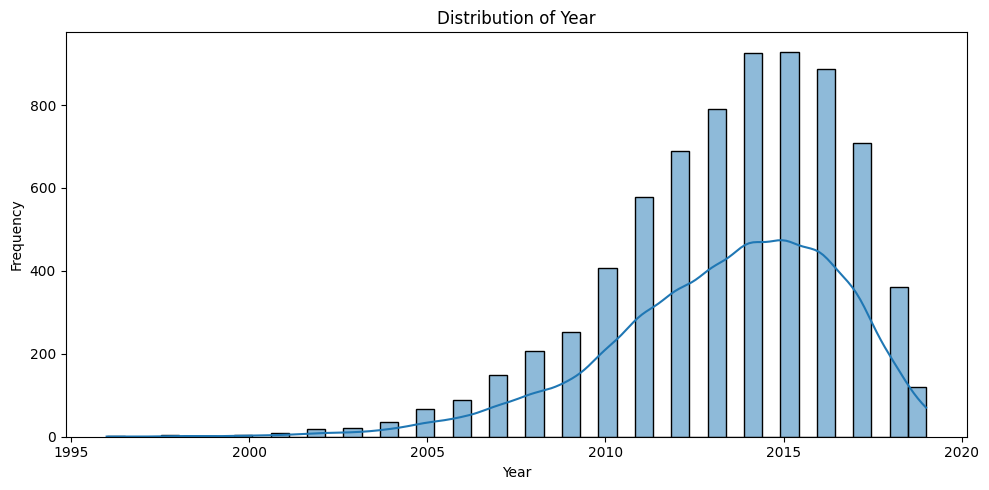

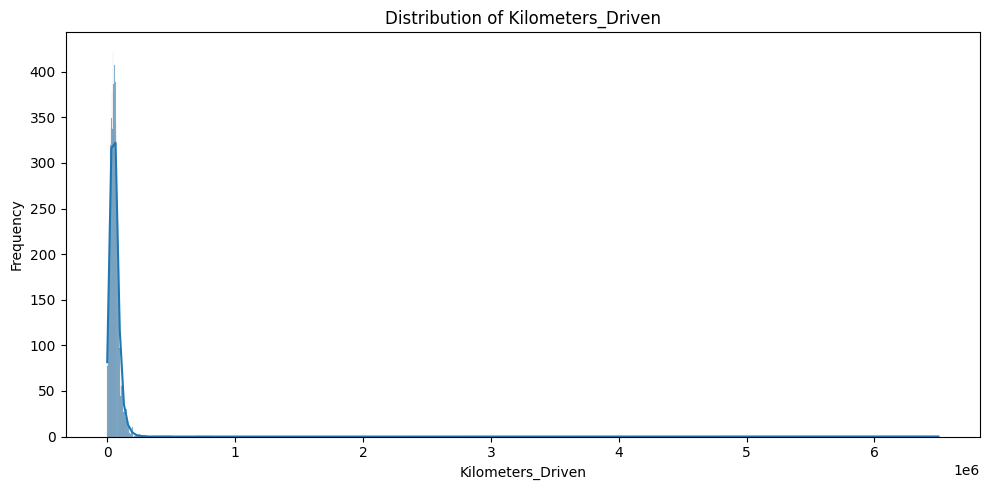

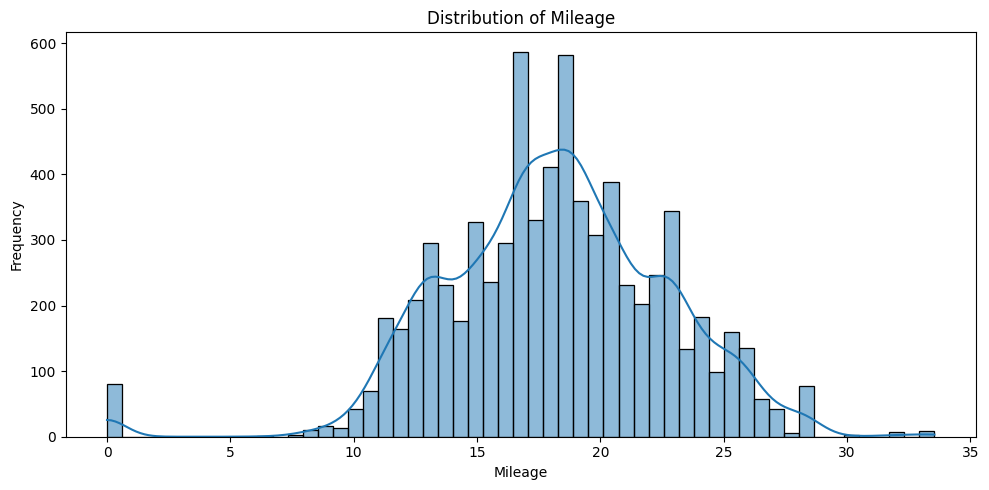

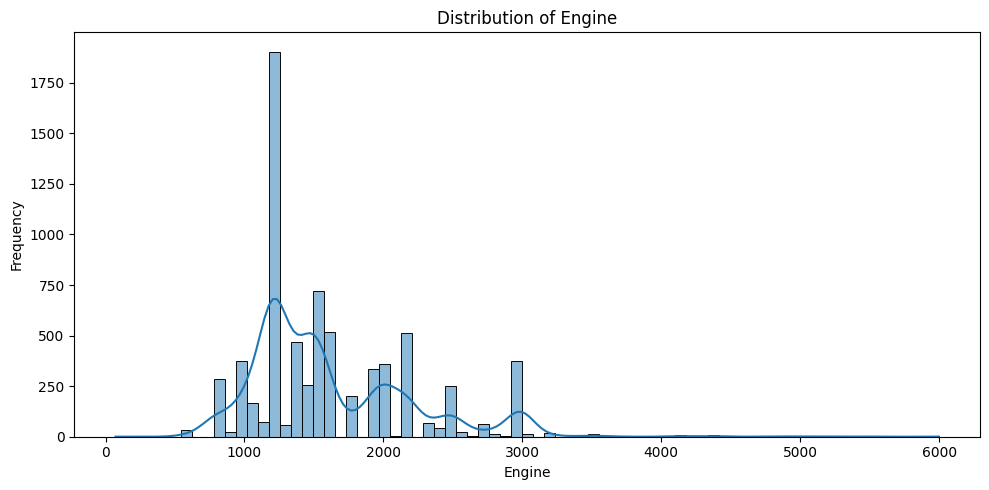

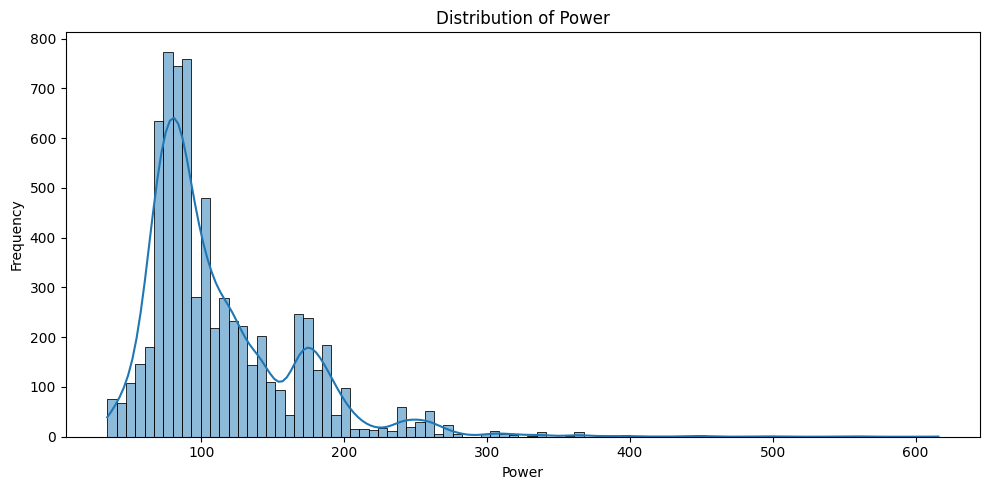

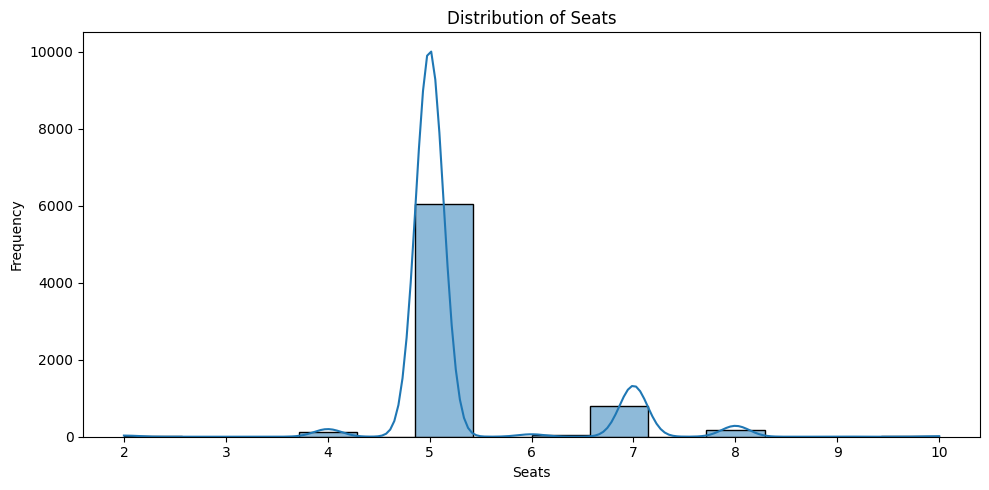

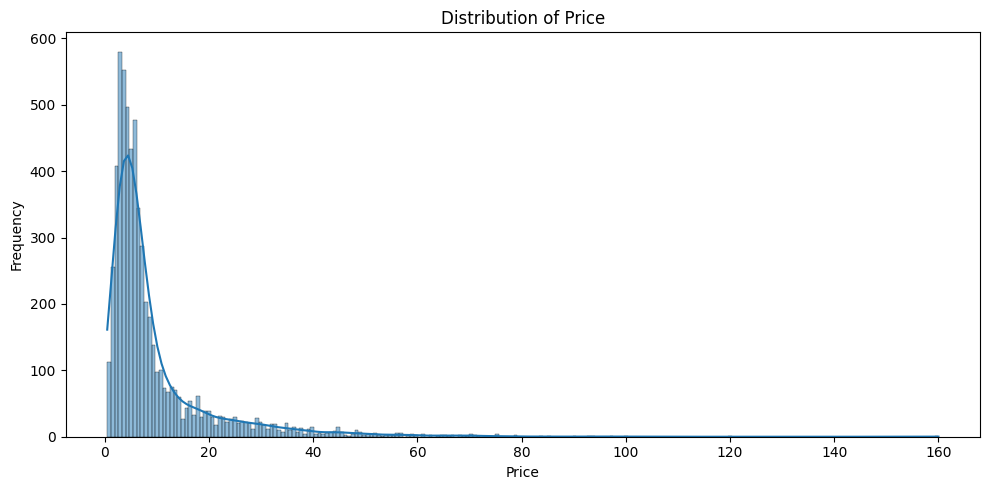

In [ ]:
numerical_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=used_car_df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

**Observations:**

- Year: The distribution is skewed towards more recent years, indicating a higher frequency of newer used cars in the dataset.

- Kilometers_Driven: This distribution is highly right-skewed, with a large concentration of cars having lower mileage and a few cars with very high mileage (outliers).

- Mileage: The distribution appears somewhat bell-shaped, suggesting a relatively normal distribution of mileage values.

- Engine: The distribution is skewed towards smaller engine sizes.

- Power: Similar to engine size, the distribution of power is also skewed towards lower values.

- Seats: The distribution shows that cars with 5 seats are the most common, with fewer cars having other seating capacities.

- Price: The distribution of the target variable, Price, is highly right-skewed. This indicates that most used cars in the dataset are in the lower price range, with a few cars having significantly higher prices (outliers).

- Based on these observations, we can see that several numerical features like Kilometers_Driven and Price have skewed distributions with potential outliers, which might require transformation or outlier treatment before building a model.

**Finding Outliers:**

In [ ]:
# Find outliers in 'Engine' using the IQR method
Q1_engine = used_car_df['Engine'].quantile(0.25)
Q3_engine = used_car_df['Engine'].quantile(0.75)
IQR_engine = Q3_engine - Q1_engine

lower_bound_engine = Q1_engine - 1.5 * IQR_engine
upper_bound_engine = Q3_engine + 1.5 * IQR_engine

outliers_engine = used_car_df[(used_car_df['Engine'] < lower_bound_engine) | (used_car_df['Engine'] > upper_bound_engine)]

print(f"Number of outliers found in Engine: {len(outliers_engine)}")
print("Top 10 Outliers in Engine:")
display(outliers_engine.sort_values(by='Engine', ascending=False).head(10)[['Engine']])

# Find outliers in 'Power' using the IQR method
Q1_power = used_car_df['Power'].quantile(0.25)
Q3_power = used_car_df['Power'].quantile(0.75)
IQR_power = Q3_power - Q1_power

lower_bound_power = Q1_power - 1.5 * IQR_power
upper_bound_power = Q3_power + 1.5 * IQR_power

outliers_power = used_car_df[(used_car_df['Power'] < lower_bound_power) | (used_car_df['Power'] > upper_bound_power)]

print(f"\nNumber of outliers found in Power: {len(outliers_power)}")
print("Top 10 Outliers in Power:")
display(outliers_power.sort_values(by='Power', ascending=False).head(10)[['Power']])

# Find outliers in 'Mileage' using the IQR method
Q1_mileage = used_car_df['Mileage'].quantile(0.25)
Q3_mileage = used_car_df['Mileage'].quantile(0.75)
IQR_mileage = Q3_mileage - Q1_mileage

lower_bound_mileage = Q1_mileage - 1.5 * IQR_mileage
upper_bound_mileage = Q3_mileage + 1.5 * IQR_mileage

outliers_mileage = used_car_df[(used_car_df['Mileage'] < lower_bound_mileage) | (used_car_df['Mileage'] > upper_bound_mileage)]

print(f"\nNumber of outliers found in Mileage: {len(outliers_mileage)}")
print("Top 10 Outliers in Mileage:")
display(outliers_mileage.sort_values(by='Mileage', ascending=False).head(10)[['Mileage']])

# Find outliers in 'Kilometers_Driven' using the IQR method
Q1_kilometers = used_car_df['Kilometers_Driven'].quantile(0.25)
Q3_kilometers = used_car_df['Kilometers_Driven'].quantile(0.75)
IQR_kilometers = Q3_kilometers - Q1_kilometers

lower_bound_kilometers = Q1_kilometers - 1.5 * IQR_kilometers
upper_bound_kilometers = Q3_kilometers + 1.5 * IQR_kilometers

outliers_kilometers = used_car_df[(used_car_df['Kilometers_Driven'] < lower_bound_kilometers) | (used_car_df['Kilometers_Driven'] > upper_bound_kilometers)]

print(f"\nNumber of outliers found in Kilometers_Driven: {len(outliers_kilometers)}")
print("Top 10 Outliers in Kilometers_Driven:")
display(outliers_kilometers.sort_values(by='Kilometers_Driven', ascending=False).head(10)[['Kilometers_Driven']])

Number of outliers found in Engine: 65
Top 10 Outliers in Engine:


,Engine
5521,5998.000
6354,5998.000
4691,5461.000
152,5461.000
4722,5461.000
5781,5204.000
5919,5000.000
5088,5000.000
4451,4951.000
70,4806.000



Number of outliers found in Power: 273
Top 10 Outliers in Power:


,Power
6354,616.000
5781,560.000
5521,552.000
2100,550.000
5088,503.000
70,500.000
5919,488.100
4821,450.000
7057,450.000
4627,450.000



Number of outliers found in Mileage: 99
Top 10 Outliers in Mileage:


,Mileage
2059,33.540
1332,33.540
2371,33.540
3129,33.540
4141,33.540
3553,33.440
4769,33.440
3869,33.440
1269,33.440
6019,32.260



Number of outliers found in Kilometers_Driven: 258
Top 10 Outliers in Kilometers_Driven:


,Kilometers_Driven
2328,6500000
340,775000
1860,720000
358,620000
3092,480000
2823,480000
4491,445000
6921,350000
3649,300000
1528,299322


**Outlier Treatment:**

While cars can accumulate high mileage, 6.5 million kilometers (which is about 4 million miles) is an extremely high figure for a used car in a typical market. It's highly improbable for a standard passenger car to have been driven that many kilometers. Hence Lets remove the record from dataset.

In [ ]:
#Remove the rows where Kilometers_Driven is 6500000.000
used_car_df = used_car_df[used_car_df['Kilometers_Driven'] != 6500000.000]

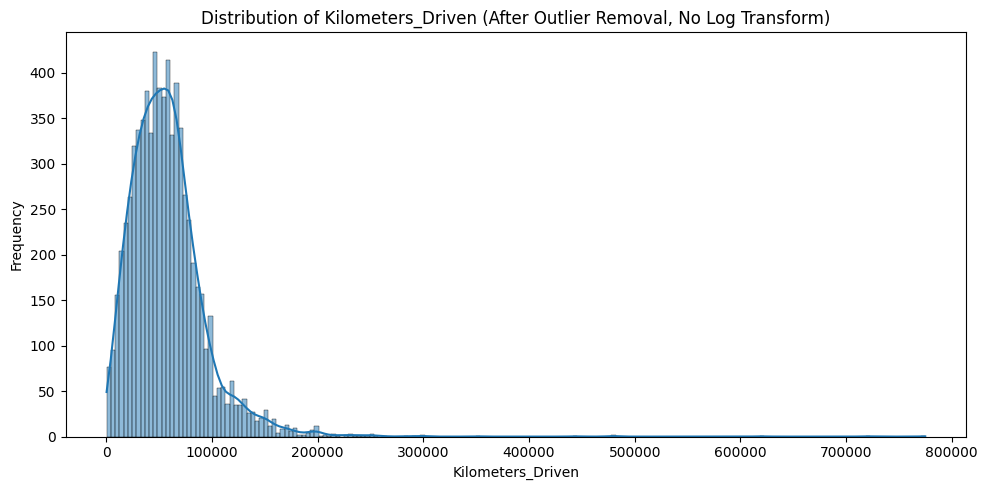

In [ ]:
# Lets draw a histogram for Kilometers_Driven after removing the outlier
plt.figure(figsize=(10, 5))
sns.histplot(data=used_car_df, x='Kilometers_Driven', kde=True)
plt.title('Distribution of Kilometers_Driven (After Outlier Removal, No Log Transform)')
plt.xlabel('Kilometers_Driven')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Observation:

Still the data is highly right skewed.

**Log Transformation:**


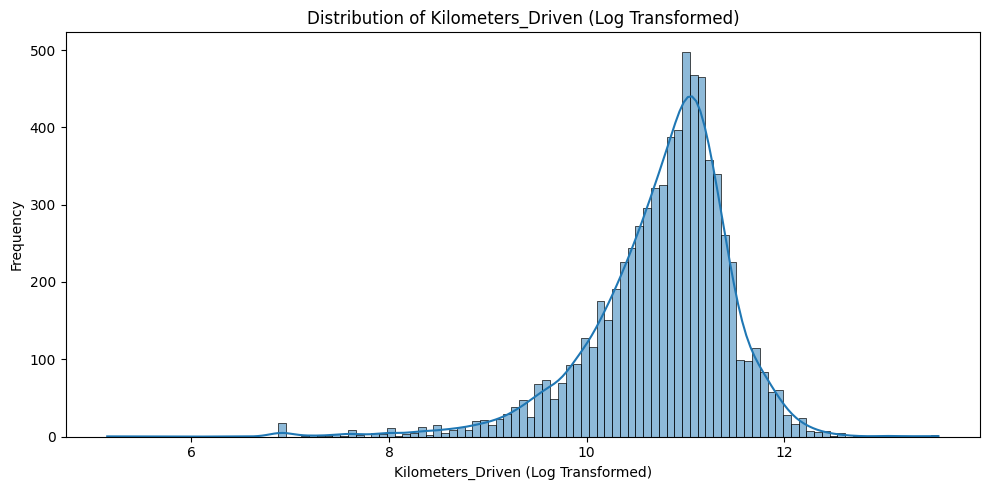

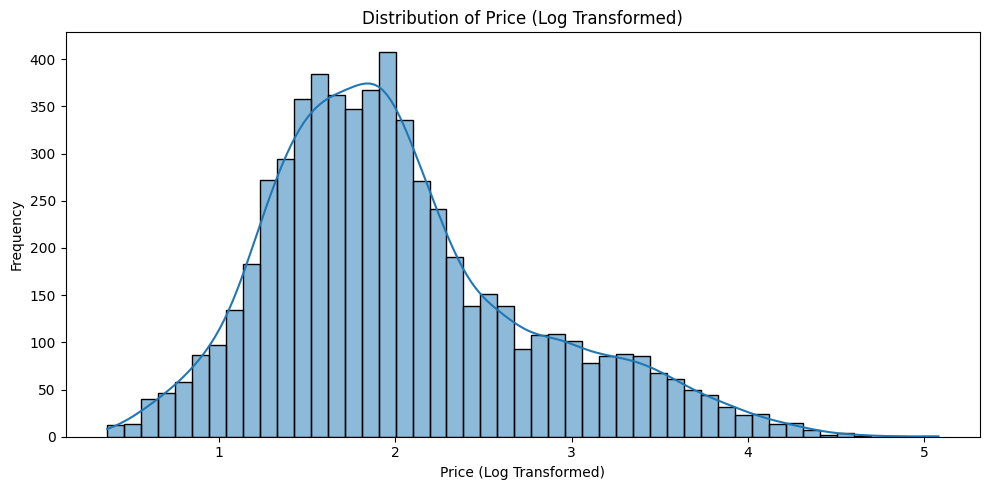

In [ ]:
# Identify skewed numerical columns based on univariate analysis
skewed_cols = ['Kilometers_Driven', 'Price']

# Apply log transformation (add 1 to handle potential zero values)
for col in skewed_cols:
    used_car_df[col + '_log'] = np.log1p(used_car_df[col])

# Visualize the distributions of the log-transformed columns
for col in skewed_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=used_car_df, x=col + '_log', kde=True)
    plt.title(f'Distribution of {col} (Log Transformed)')
    plt.xlabel(f'{col} (Log Transformed)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

**Observations:**

- Kilometers_Driven (Log Transformed): The distribution of the log-transformed Kilometers_Driven is much more symmetrical and less skewed than the original distribution. The outliers with extremely high mileage have been brought closer to the main body of the data.

- Price (Log Transformed): The distribution of the log-transformed Price is also significantly less skewed and more closely resembles a normal distribution compared to the original Price distribution. The wide range of prices has been compressed, and the influence of high-price outliers has been reduced.

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

**Correlation heatmap:**

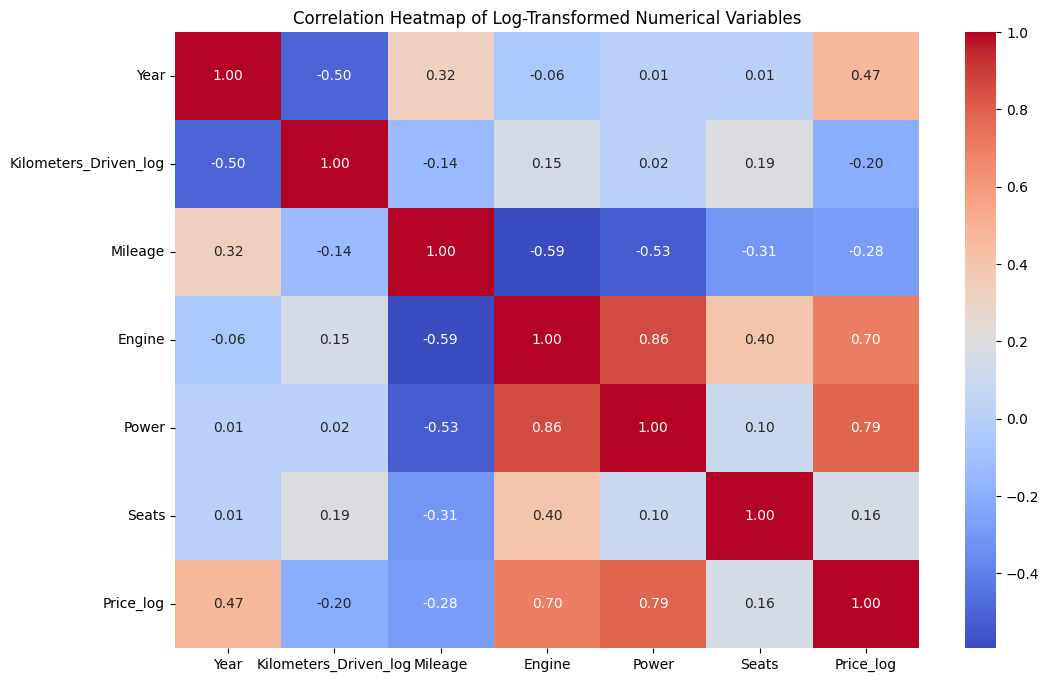

In [ ]:
log_transformed_cols = ['Year', 'Kilometers_Driven_log', 'Mileage', 'Engine', 'Power', 'Seats', 'Price_log']

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(used_car_df[log_transformed_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Log-Transformed Numerical Variables')
plt.show()

Observations:

- Power and Engine have the strongest positive correlation with Price_log (0.78 and 0.70 respectively).

- Year also has a notable positive correlation with Price_log (0.47).

- Kilometers_Driven_log and Mileage have negative correlations with Price_log (-0.20 and -0.28 respectively), but these are weaker than the positive correlations.

- There are also correlations among the predictor variables themselves (e.g., strong positive correlation between Engine and Power).

**Box Plot:**

Box plot between log tranformed price against various location understand the distribution

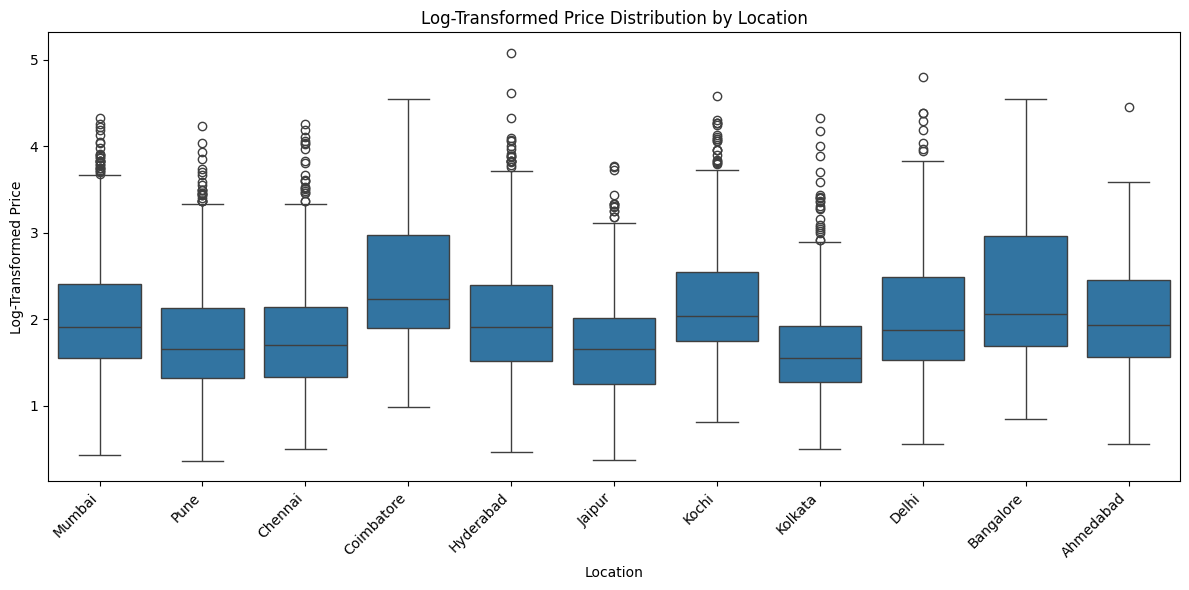

In [ ]:
# Box plot for Price (log-transformed) and Location
plt.figure(figsize=(12, 6))
sns.boxplot(data=used_car_df, x='Location', y='Price_log')
plt.title('Log-Transformed Price Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Log-Transformed Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Observations:

- The box plot shows that the distribution of log-transformed prices varies across different locations. Some locations appear to have a higher median price and a wider range of prices than others. This suggests that location could be an important factor influencing used car prices.

**Scatter Plot**

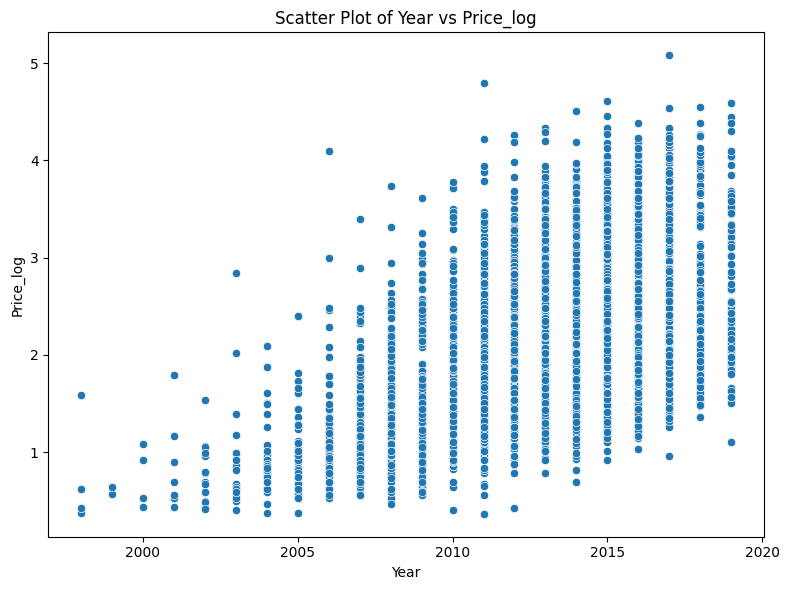

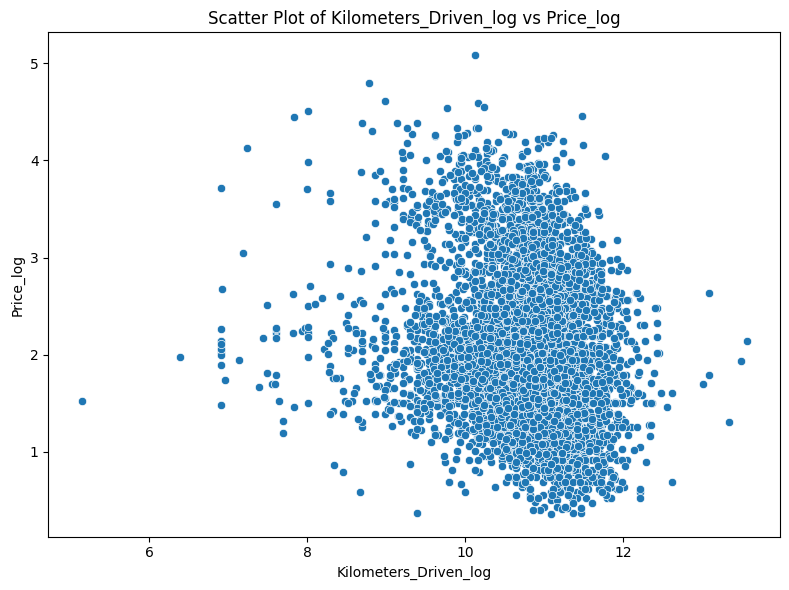

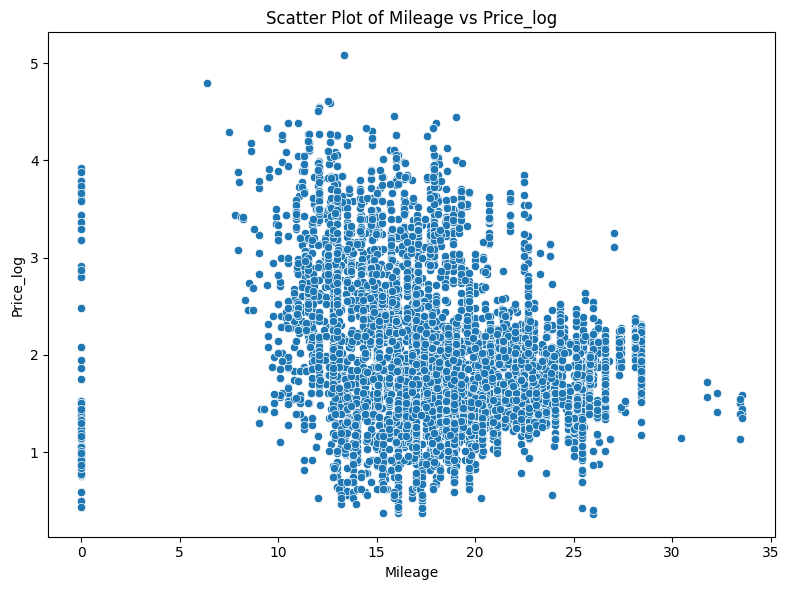

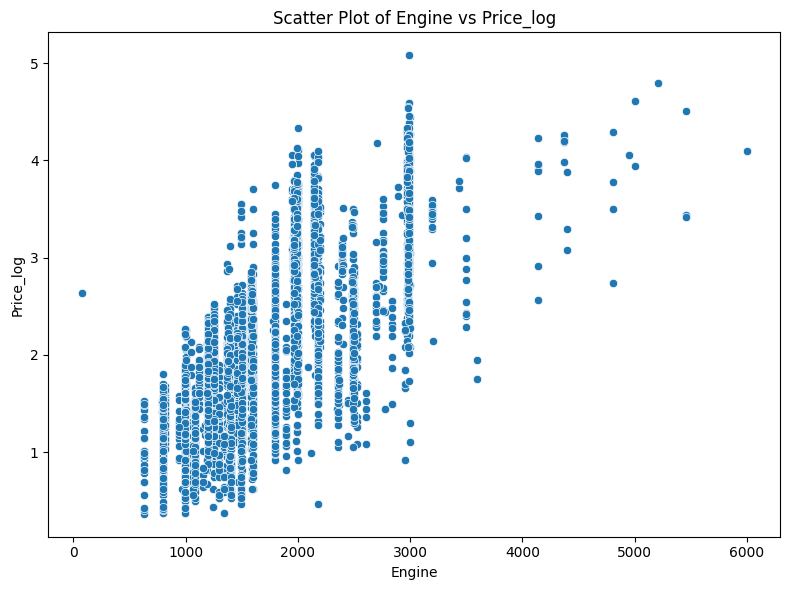

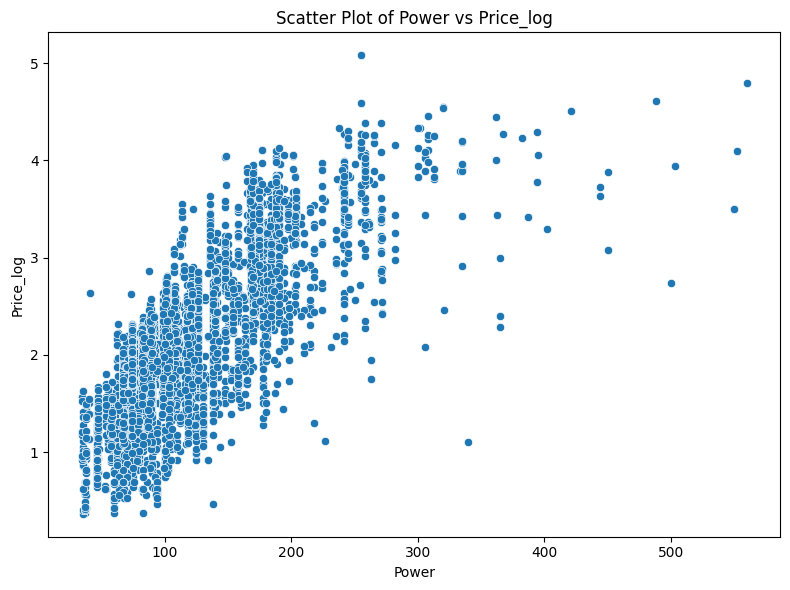

In [ ]:
# Based on the heatmap, columns with higher absolute correlation values are:
# Year (0.47), Engine (0.70), Power (0.78), Kilometers_Driven_log (-0.20), Mileage (-0.28)

correlated_cols = ['Year', 'Kilometers_Driven_log', 'Mileage', 'Engine', 'Power']
target_col = 'Price_log'

for col in correlated_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=used_car_df, x=col, y=target_col)
    plt.title(f'Scatter Plot of {col} vs {target_col}')
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.tight_layout()
    plt.show()

Observations:

- Year vs. Price_log: There appears to be a positive correlation between the year of manufacture and the log-transformed price. Newer cars tend to have higher prices.

- Kilometers_Driven_log vs. Price_log: There seems to be a slight negative correlation between the log-transformed kilometers driven and the log-transformed price. Cars with higher mileage generally have lower prices, although the relationship is not very strong.

- Mileage vs. Price_log: There is a weak negative correlation between mileage and log-transformed price. This might be counter-intuitive, but higher mileage often correlates with smaller, less expensive cars.

- Engine vs. Price_log: There is a strong positive correlation between engine size and log-transformed price. Cars with larger engines tend to be more expensive.

- Power vs. Price_log: There is a strong positive correlation between power and log-transformed price. Cars with higher power output tend to be more expensive

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column?

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

**New feature: Brand**

Extracting the brand from the car name helps reduce the number of unique values, making it easier for models to learn. It captures a key factor influencing price (brand reputation) and simplifies the dataset, improving model generalization and interpretability.

In [ ]:
# Extract car brand from the 'Name' column
used_car_df['Brand'] = used_car_df['Name'].apply(lambda x: x.split(' ')[0])

# Display the first few rows with the new 'Brand' column
display(used_car_df.head())


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Kilometers_Driven_log,Price_log,Brand
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.600,998.000,58.160,5.000,NaN,1.750,11.184,1.012,Maruti
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.000,126.200,5.000,NaN,12.500,10.621,2.603,Hyundai
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.000,8.610,4.500,10.736,1.705,Honda
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.000,88.760,7.000,NaN,6.000,11.374,1.946,Maruti
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,NaN,17.740,10.613,2.931,Audi


In [ ]:
# Check the number of unique brands
print(f"\nNumber of unique car brands: {used_car_df['Brand'].nunique()}")


Number of unique car brands: 33


In [ ]:
# Display the counts of the top brands
print("\nTop 10 Car Brands:")
display(used_car_df['Brand'].value_counts().head(10))


Top 10 Car Brands:


,count
Brand,
Maruti,1444
Hyundai,1340
Honda,743
Toyota,507
Mercedes-Benz,380
Volkswagen,374
Ford,351
Mahindra,331
BMW,311


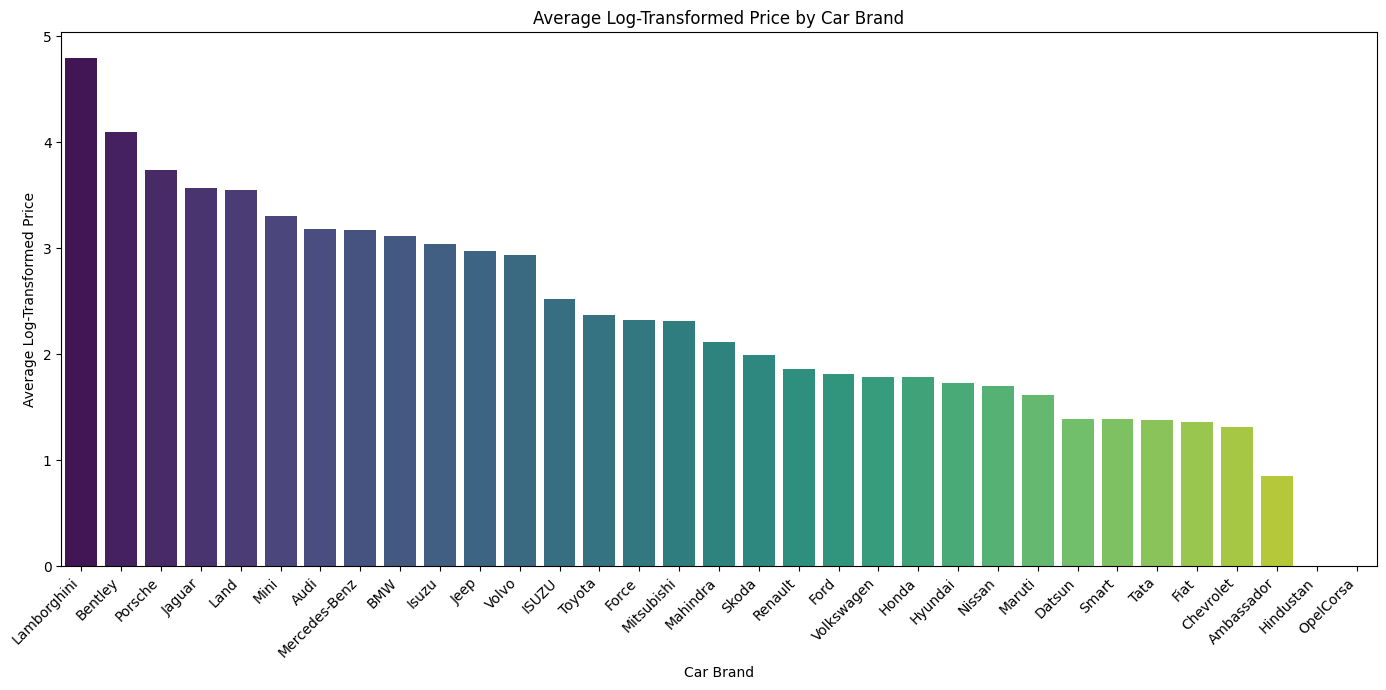

In [ ]:
# Calculate the average log-transformed price for each brand
average_price_by_brand = used_car_df.groupby('Brand')['Price_log'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=average_price_by_brand.index, y=average_price_by_brand.values, palette='viridis')
plt.title('Average Log-Transformed Price by Car Brand')
plt.xlabel('Car Brand')
plt.ylabel('Average Log-Transformed Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**New Feature: Age**

Car age is a strong indicator of depreciation and wear and tear, which are significant factors influencing the price of a used car. By including 'Age' as a feature, the model can directly learn the relationship between how old a car is and its price.

In [ ]:
# Create an 'Age' feature
current_year = 2024 # Assuming the current year is 2024
used_car_df['Age'] = current_year - used_car_df['Year']

# Display the first few rows with the new 'Age' column
print("DataFrame with 'Age' column:")
display(used_car_df.head())

DataFrame with 'Age' column:


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Kilometers_Driven_log,Price_log,Brand,Age
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.600,998.000,58.160,5.000,NaN,1.750,11.184,1.012,Maruti,14
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.000,126.200,5.000,NaN,12.500,10.621,2.603,Hyundai,9
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.000,8.610,4.500,10.736,1.705,Honda,13
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.000,88.760,7.000,NaN,6.000,11.374,1.946,Maruti,12
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,NaN,17.740,10.613,2.931,Audi,11


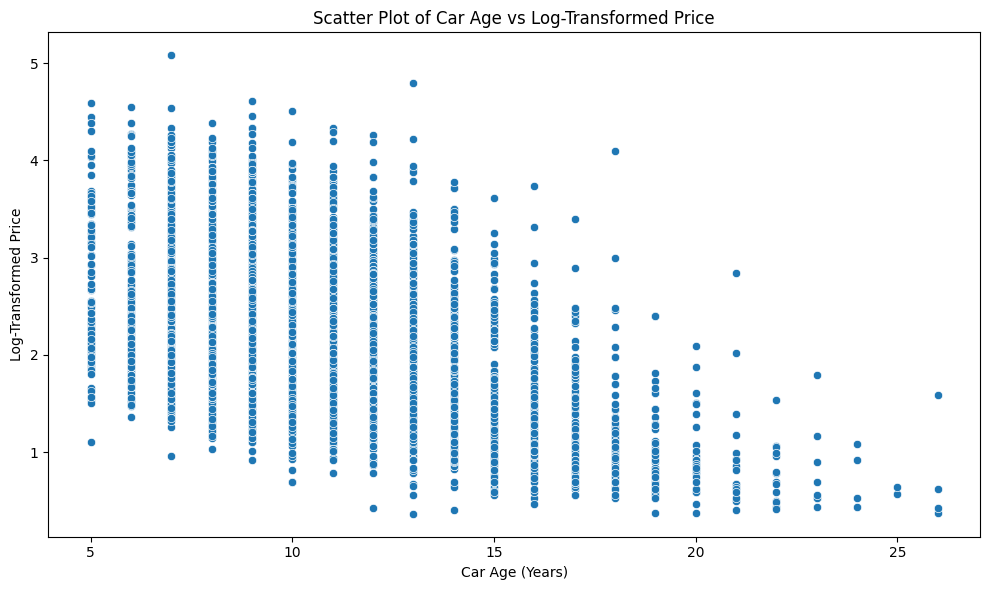

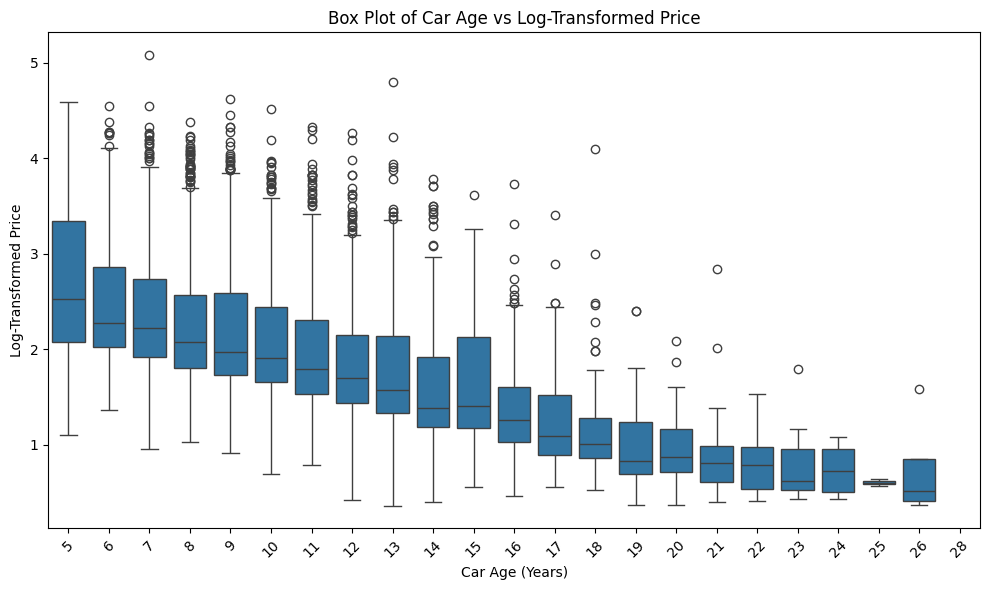

In [ ]:
# Visualize the relationship between Age and Price_log
plt.figure(figsize=(10, 6))
sns.scatterplot(data=used_car_df, x='Age', y='Price_log')
plt.title('Scatter Plot of Car Age vs Log-Transformed Price')
plt.xlabel('Car Age (Years)')
plt.ylabel('Log-Transformed Price')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=used_car_df, x='Age', y='Price_log')
plt.title('Box Plot of Car Age vs Log-Transformed Price')
plt.xlabel('Car Age (Years)')
plt.ylabel('Log-Transformed Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observations:
- Both scatter and box plots confirm that car age is a significant factor influencing the price of used cars, with newer cars commanding higher prices and older cars having lower and less variable prices.

### **Missing value treatment**

Based on the earlier analysis, the columns with missing values are:

- Mileage: 2 missing values (0.028%)
- Engine: 46 missing values (0.634%)
- Power: 175 missing values (2.413%)
- Seats: 53 missing values (0.731%)
- New_price: 6247 missing values (86.130%)
- Price: 1234 missing values (17.014%)

The 'New_price' column has a very high percentage of missing values and might not be useful for modeling.

The 'Price' column is our target variable, and the missing values here will need to be handled before splitting the data for modeling.

For other columns with a small percentage of missing values, we can consider imputation strategies.

We are imputing missing values (Mileage, Engine, Power, and Seats), the percentage of missing data is very small (all less than 3%). In such cases, a simple imputation strategy like using the median of the entire column is generally sufficient and less complex than grouping by brand.

In [ ]:
# Impute missing values in 'Mileage', 'Engine', 'Power', and 'Seats' with the median
for col in ['Mileage', 'Engine', 'Power', 'Seats']:
    used_car_df[col].fillna(used_car_df[col].median(), inplace=True)

In [ ]:
# For the target variable 'Price', we will drop rows with missing values.
#Imputing the target variable can introduce bias into the model.

used_car_df.dropna(subset=['Price'], inplace=True)

In [ ]:
#With such a high percentage of missing values, the New_price column provides very little information.
#We have other features like 'Year', 'Brand', 'Engine', and 'Power' that likely capture similar aspects of a car's value as the new price would.
#These features have far fewer missing values and are more reliable for modeling. Hence lets remove this column.
used_car_df = used_car_df.drop('New_price', axis=1)

In [ ]:
# Check for missing values again after treatment
print("Missing values after treatment:")
display(used_car_df.isnull().sum())


Missing values after treatment:


,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

- **Data Quality:** Significant missing values are found, particularly in New_price (very high %) and Price (17%). Missing values in Mileage, Engine, Power, and Seats are imputed, while rows with missing Price are dropped. New_price is likely not useful for modeling due to extensive missing data.

- **Key Predictors:** Engine, Power, and Year show the strongest positive correlations with Price. Kilometers_Driven and Mileage have weaker negative correlations. Location also influences price distribution.

- **Data Transformation:** Kilometers_Driven and Price are highly skewed and successfully transformed using np.log1p to achieve more symmetrical distributions, which is good for modeling.

- **Feature Engineering:** Extracting 'Brand' from 'Name' creates a useful categorical feature with fewer unique values.

- **Market Composition:** The dataset primarily contains cars with diesel fuel, manual transmission, and first owners, concentrated in specific locations.

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name.
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:**

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

- Handle high cardinality in categorical features ('Name').
- Prevent data leakage by excluding the target variable ('Price', 'price_log') from the features.
- Avoid multicollinearity and redundancy when using a transformed version of a feature ('Kilometers_Driven').

**Seperate the feature and split data**

In [ ]:
# Separate features (X) and target (y)
X = used_car_df.drop(['S.No.', 'Name', 'Price', 'Price_log', 'Kilometers_Driven','Year'], axis=1)
y = used_car_df['Price_log']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4814, 11)
Shape of X_test: (1204, 11)
Shape of y_train: (4814,)
Shape of y_test: (1204,)


**Categorical columns: On-hot Encoding**

In [ ]:
# Select categorical columns for encoding
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align columns - this is crucial after one-hot encoding to ensure both train and test sets have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='inner', axis=1, fill_value=0)


print("\nShape of X_train_encoded:", X_train_encoded.shape)
print("Shape of X_test_encoded:", X_test_encoded.shape)

# Display the first few rows of the encoded training data
print("\nFirst 5 rows of X_train_encoded:")
display(X_train_encoded.head())


Shape of X_train_encoded: (4814, 46)
Shape of X_test_encoded: (1204, 46)

First 5 rows of X_train_encoded:


,Mileage,Engine,Power,Seats,Kilometers_Driven_log,Age,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_BMW,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,Brand_Jeep,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
3011,25.000,1396.000,69.010,5.000,11.264,8,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4379,16.550,1968.000,140.000,5.000,10.968,13,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3840,26.590,1248.000,74.000,5.000,10.326,8,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1204,12.350,2179.000,187.740,5.000,11.472,12,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5643,18.900,998.000,67.100,5.000,11.736,21,False,False,False,False,False,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


**Numerical columns: Apply StandardScaler**

In [ ]:
# Creating an instance of the StandardScaler
scaler = StandardScaler()

# Applying fit_transform on the training features data
X_train_scaled = scaler.fit_transform(X_train_encoded)

# Applying fit_transform on the testing features data
X_test_scaled = scaler.fit_transform(X_test_encoded)

# Convert the data in array format to pandas DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train_encoded.index, columns = X_train_encoded.columns)

X_train_scaled.head()

,Mileage,Engine,Power,Seats,Kilometers_Driven_log,Age,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_BMW,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,Brand_Jeep,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
3011,1.506,-0.373,-0.816,-0.347,0.722,-0.797,-0.251,-0.303,-0.350,-0.324,-0.371,-0.267,-0.343,3.185,-0.388,-0.337,0.933,-0.913,0.630,-0.038,-0.429,-0.145,-0.215,-0.143,-0.048,-0.065,-0.020,-0.225,-0.330,-0.474,-0.078,-0.052,-0.096,-0.223,-0.501,-0.238,-0.066,-0.065,-0.121,-0.050,-0.159,-0.170,5.615,-0.275,-0.242,-0.058
4379,-0.356,0.574,0.514,-0.347,0.306,0.734,-0.251,-0.303,-0.350,3.088,-0.371,-0.267,-0.343,-0.314,-0.388,-0.337,0.933,-0.913,-1.588,-0.038,-0.429,-0.145,-0.215,-0.143,-0.048,-0.065,-0.020,-0.225,-0.330,-0.474,-0.078,-0.052,-0.096,-0.223,-0.501,-0.238,-0.066,-0.065,-0.121,-0.050,-0.159,-0.170,-0.178,-0.275,-0.242,-0.058
3840,1.856,-0.619,-0.723,-0.347,-0.597,-0.797,-0.251,-0.303,-0.350,-0.324,-0.371,-0.267,-0.343,-0.314,-0.388,2.967,0.933,-0.913,-1.588,-0.038,-0.429,-0.145,-0.215,-0.143,-0.048,-0.065,-0.020,-0.225,-0.330,-0.474,-0.078,-0.052,-0.096,-0.223,1.996,-0.238,-0.066,-0.065,-0.121,-0.050,-0.159,-0.170,-0.178,-0.275,-0.242,-0.058
1204,-1.281,0.924,1.408,-0.347,1.013,0.428,-0.251,-0.303,-0.350,-0.324,2.694,-0.267,-0.343,-0.314,-0.388,-0.337,0.933,-0.913,-1.588,-0.038,-0.429,-0.145,-0.215,-0.143,-0.048,-0.065,-0.020,-0.225,-0.330,-0.474,-0.078,-0.052,10.412,-0.223,-0.501,-0.238,-0.066,-0.065,-0.121,-0.050,-0.159,-0.170,-0.178,-0.275,-0.242,-0.058
5643,0.162,-1.033,-0.852,-0.347,1.384,3.183,-0.251,-0.303,-0.350,-0.324,-0.371,-0.267,-0.343,-0.314,-0.388,2.967,-1.072,1.096,0.630,-0.038,2.330,-0.145,-0.215,-0.143,-0.048,-0.065,-0.020,-0.225,-0.330,-0.474,-0.078,-0.052,-0.096,-0.223,1.996,-0.238,-0.066,-0.065,-0.121,-0.050,-0.159,-0.170,-0.178,-0.275,-0.242,-0.058


In [ ]:
# Convert the test data in array format to pandas DataFrame
X_test_scaled = pd.DataFrame(X_test_scaled, index = X_test_encoded.index, columns = X_test_encoded.columns)

X_test_scaled.head()

,Mileage,Engine,Power,Seats,Kilometers_Driven_log,Age,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_BMW,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,Brand_Jeep,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
1315,-0.214,-0.204,0.084,-0.339,0.555,0.366,3.936,-0.279,-0.317,-0.296,-0.390,-0.289,-0.370,-0.306,-0.390,-0.349,-1.049,1.076,0.643,-0.041,-0.472,-0.108,-0.217,-0.146,-0.041,-0.082,-0.029,-0.245,2.826,-0.478,-0.096,-0.041,-0.116,-0.195,-0.505,-0.227,-0.065,-0.076,-0.136,-0.071,-0.149,-0.181,-0.181,-0.252,-0.204,-0.065
5825,0.674,-0.203,-0.196,-0.339,1.269,-0.550,-0.254,-0.279,-0.317,-0.296,-0.390,-0.289,-0.370,-0.306,2.564,-0.349,0.953,-0.929,-1.556,-0.041,-0.472,-0.108,-0.217,-0.146,-0.041,-0.082,-0.029,-0.245,-0.354,-0.478,-0.096,-0.041,-0.116,-0.195,-0.505,-0.227,-0.065,-0.076,-0.136,-0.071,-0.149,-0.181,-0.181,-0.252,4.907,-0.065
1744,1.371,-0.632,-0.474,2.203,1.281,-1.161,-0.254,-0.279,-0.317,-0.296,-0.390,-0.289,-0.370,-0.306,-0.390,2.862,0.953,-0.929,0.643,-0.041,-0.472,-0.108,-0.217,-0.146,-0.041,-0.082,-0.029,-0.245,-0.354,-0.478,-0.096,-0.041,-0.116,-0.195,1.978,-0.227,-0.065,-0.076,-0.136,-0.071,-0.149,-0.181,-0.181,-0.252,-0.204,-0.065
1860,0.532,-0.031,-0.188,-0.339,3.776,0.060,-0.254,3.583,-0.317,-0.296,-0.390,-0.289,-0.370,-0.306,-0.390,-0.349,0.953,-0.929,0.643,-0.041,-0.472,-0.108,-0.217,-0.146,-0.041,-0.082,-0.029,-0.245,-0.354,-0.478,-0.096,-0.041,-0.116,-0.195,-0.505,-0.227,-0.065,-0.076,-0.136,-0.071,-0.149,-0.181,-0.181,-0.252,4.907,-0.065
1559,0.735,-0.632,-0.468,-0.339,0.867,0.366,-0.254,-0.279,-0.317,-0.296,-0.390,-0.289,-0.370,-0.306,2.564,-0.349,0.953,-0.929,0.643,-0.041,-0.472,-0.108,-0.217,-0.146,-0.041,-0.082,-0.029,-0.245,-0.354,-0.478,-0.096,-0.041,-0.116,-0.195,1.978,-0.227,-0.065,-0.076,-0.136,-0.071,-0.149,-0.181,-0.181,-0.252,-0.204,-0.065


For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

**Utility Funtions**

Funtion to caculate the VIF score

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    """
    This function takes a dataframe of features and calculates the VIF for each one.
    It returns a new dataframe with the feature names and their corresponding VIF scores.
    """
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

Funtion calculate model performance

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score

def get_model_performance(model, X_train, y_train, X_test, y_test):
    """
    This function takes a fitted model and the training and testing data as input,
    and it prints the R-squared, RMSE, and MAE for both the training and testing sets
    in a table format.
    """


    # Get predictions on the training data
    y_train_pred = model.predict(X_train)

    # Get predictions on the testing data
    y_test_pred = model.predict(X_test)

    # Calculate metrics for the training set
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)

    # Calculate metrics for the testing set
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Create a DataFrame to display the metrics
    performance_df = pd.DataFrame({
        'Metric': ['R-squared', 'RMSE', 'MAE'],
        'Training Set': [r2_train, rmse_train, mae_train],
        'Testing Set': [r2_test, rmse_test, mae_test]
    })

    # Display the DataFrame
    display(performance_df)

Funtion to calculate cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
import numpy as np

def perform_cross_validation(model, X_train, y_train, model_name="Model", cv_folds=10):
    """
    Performs cross-validation for a given model and prints R-squared, RMSE, and MAE scores.

    Args:
        model: The regression model to evaluate.
        X_train: The training features.
        y_train: The training target variable.
        model_name: The name of the model for printing results.
        cv_folds: The number of cross-validation folds.
    """
    # Define the scoring metrics
    scoring = {
      'r2': 'r2',
      'neg_rmse': 'neg_root_mean_squared_error',
      'neg_mae': 'neg_mean_absolute_error'
    }

    # Perform cross-validation for each metric
    cv_results_r2 = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring=scoring['r2'])
    cv_results_rmse = -cross_val_score(model, X_train, y_train, cv=cv_folds, scoring=scoring['neg_rmse'])
    cv_results_mae = -cross_val_score(model, X_train, y_train, cv=cv_folds, scoring=scoring['neg_mae'])

    # Calculate mean and standard deviation for each metric
    mean_r2 = cv_results_r2.mean()
    std_r2 = cv_results_r2.std()

    mean_rmse = cv_results_rmse.mean()
    std_rmse = cv_results_rmse.std()

    mean_mae = cv_results_mae.mean()
    std_mae = cv_results_mae.std()

    # Print the cross-validation results
    print(f"\n{model_name} Cross-Validation Results ({cv_folds}-fold):")
    print(f"R-squared: {mean_r2:.4f} (+/- {std_r2 * 2:.4f})")
    print(f"RMSE: {mean_rmse:.4f} (+/- {std_rmse * 2:.4f})")
    print(f"MAE: {mean_mae:.4f} (+/- {std_mae * 2:.4f})")

### **Linear Regression:**

In [ ]:
# Add a constant to the independent variables for the OLS model
X_train_scaled_constant = sm.add_constant(X_train_scaled) # Convert to float

# Fit the OLS model
ols_model1 = sm.OLS(y_train, X_train_scaled_constant).fit()

# Print the model summary
print(ols_model1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1293.
Date:                Tue, 12 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:43:25   Log-Likelihood:                 817.12
No. Observations:                4814   AIC:                            -1540.
Df Residuals:                    4767   BIC:                            -1236.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Observations:

- The OLS model 1 has a high R-squared (0.926), indicating a good fit. Most features are statistically significant (low p-values), but some location and brand variables are not.

#### **Check for Multicollinearity and rebuild the model:**

The VIF score helps us detect multicollinearity between independent variables. We consider a VIF score greater than 5 as evidence of multicollinearity.

In [ ]:
# Calculate and display the VIF for the training data
vif_scores = calculate_vif(X_train_scaled_constant)
print(vif_scores)

                    variables    VIF
0                       const  1.000
1                     Mileage  3.077
2                      Engine 10.042
3                       Power  8.780
4                       Seats  2.554
5       Kilometers_Driven_log  1.783
6                         Age  2.210
7          Location_Bangalore  2.504
8            Location_Chennai  3.080
9         Location_Coimbatore  3.655
10             Location_Delhi  3.274
11         Location_Hyderabad  3.810
12            Location_Jaipur  2.655
13             Location_Kochi  3.557
14           Location_Kolkata  3.202
15            Location_Mumbai  4.072
16              Location_Pune  3.441
17           Fuel_Type_Diesel 24.269
18           Fuel_Type_Petrol 24.633
19        Transmission_Manual  2.243
20  Owner_Type_Fourth & Above  1.016
21          Owner_Type_Second  1.167
22           Owner_Type_Third  1.127
23                  Brand_BMW  2.041
24            Brand_Chevrolet  1.791
25               Brand_Datsun  1.132
2

Observations:

- The VIF scores show that Engine and Power have high VIF values, indicating potential multicollinearity between these features. Fuel_Type_Diesel and Fuel_Type_Petrol also show high VIFs.


In [ ]:
# Drop the 'Engine' column from the training and testing data
X_train_scaled1 = X_train_scaled.drop('Engine', axis=1)
X_test_scaled1 = X_test_scaled.drop('Engine', axis=1)

print("Shape of X_train_scaled1 after dropping Engine:", X_train_scaled1.shape)
print("Shape of X_test_scaled1 after dropping Engine:", X_test_scaled1.shape)

Shape of X_train_scaled1 after dropping Engine: (4814, 45)
Shape of X_test_scaled1 after dropping Engine: (1204, 45)


In [ ]:
# Add a constant to the independent variables for the OLS model after dropping Engine
X_train_ols2 = sm.add_constant(X_train_scaled1)
# Fit the OLS model
ols_model2 = sm.OLS(y_train, X_train_ols2).fit()

# Print the model summary
print(ols_model2.summary())


                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1306.
Date:                Tue, 12 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:43:26   Log-Likelihood:                 789.61
No. Observations:                4814   AIC:                            -1487.
Df Residuals:                    4768   BIC:                            -1189.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
# Calculate and display the VIF for the training data
vif_scores2 = calculate_vif(X_train_ols2)
print(vif_scores2)

                    variables    VIF
0                       const  1.000
1                     Mileage  2.835
2                       Power  3.512
3                       Seats  2.370
4       Kilometers_Driven_log  1.783
5                         Age  2.198
6          Location_Bangalore  2.504
7            Location_Chennai  3.080
8         Location_Coimbatore  3.654
9              Location_Delhi  3.274
10         Location_Hyderabad  3.810
11            Location_Jaipur  2.655
12             Location_Kochi  3.557
13           Location_Kolkata  3.202
14            Location_Mumbai  4.072
15              Location_Pune  3.440
16           Fuel_Type_Diesel 24.238
17           Fuel_Type_Petrol 24.488
18        Transmission_Manual  2.243
19  Owner_Type_Fourth & Above  1.016
20          Owner_Type_Second  1.167
21           Owner_Type_Third  1.127
22                  Brand_BMW  2.039
23            Brand_Chevrolet  1.790
24               Brand_Datsun  1.131
25                 Brand_Fiat  1.169
2

Observations:

- After dropping 'Engine', the R-squared for OLS model 2 remains high (0.925), and most features are still significant. The VIF scores for 'Power' have decreased but Fuel_Type_Diesel and Fuel_Type_Petrol still show high VIFs, suggesting remaining multicollinearity.

In [ ]:
# Drop the 'Fuel_Type_Petrol' column from the training and testing data
X_train_scaled2 = X_train_scaled1.drop('Fuel_Type_Petrol', axis=1)
X_test_scaled2 = X_test_scaled1.drop('Fuel_Type_Petrol', axis=1)

print("Shape of X_train_scaled2 after dropping Fuel_Type_Petrol:", X_train_scaled2.shape)
print("Shape of X_test_scaled2 after dropping Fuel_Type_Petrol:", X_test_scaled2.shape)

Shape of X_train_scaled2 after dropping Fuel_Type_Petrol: (4814, 44)
Shape of X_test_scaled2 after dropping Fuel_Type_Petrol: (1204, 44)


In [ ]:
# Add a constant to the independent variables for the OLS model after dropping Fuel_Type_Petrol
X_train_ols3 = sm.add_constant(X_train_scaled2)
# Fit the OLS model
ols_model3 = sm.OLS(y_train, X_train_ols3).fit()

# Print the model summary
print(ols_model3.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1333.
Date:                Tue, 12 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:43:27   Log-Likelihood:                 784.61
No. Observations:                4814   AIC:                            -1479.
Df Residuals:                    4769   BIC:                            -1188.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
# Calculate and display the VIF for the training data
vif_scores3 = calculate_vif(X_train_ols3)
print(vif_scores3)

                    variables   VIF
0                       const 1.000
1                     Mileage 2.768
2                       Power 3.511
3                       Seats 2.363
4       Kilometers_Driven_log 1.772
5                         Age 2.198
6          Location_Bangalore 2.503
7            Location_Chennai 3.080
8         Location_Coimbatore 3.652
9              Location_Delhi 3.274
10         Location_Hyderabad 3.810
11            Location_Jaipur 2.653
12             Location_Kochi 3.556
13           Location_Kolkata 3.200
14            Location_Mumbai 4.072
15              Location_Pune 3.440
16           Fuel_Type_Diesel 2.118
17        Transmission_Manual 2.243
18  Owner_Type_Fourth & Above 1.016
19          Owner_Type_Second 1.167
20           Owner_Type_Third 1.127
21                  Brand_BMW 2.038
22            Brand_Chevrolet 1.787
23               Brand_Datsun 1.131
24                 Brand_Fiat 1.169
25                Brand_Force 1.023
26                 Brand_For

Observations:

- After dropping 'Fuel_Type_Petrol', the R-squared remains high (0.925), and most features are still significant. The VIF scores for Fuel_Type_Diesel and Fuel_Type_Petrol are now low, indicating that the multicollinearity related to fuel type has been addressed. However, some brand variables still have high VIFs

In [ ]:
# Drop the 'Brand_Maruti' column from the training and testing data
X_train_scaled3 = X_train_scaled2.drop('Brand_Maruti', axis=1)
X_test_scaled3 = X_test_scaled2.drop('Brand_Maruti', axis=1)

print("Shape of X_train_scaled3 after dropping Brand_Maruti:", X_train_scaled3.shape)
print("Shape of X_test_scaled3 after dropping Brand_Maruti:", X_test_scaled3.shape)

Shape of X_train_scaled3 after dropping Brand_Maruti: (4814, 43)
Shape of X_test_scaled3 after dropping Brand_Maruti: (1204, 43)


In [ ]:
# Add a constant to the independent variables for the OLS model after dropping Brand_Maruti
X_train_ols4 = sm.add_constant(X_train_scaled3)
# Fit the OLS model
ols_model4 = sm.OLS(y_train, X_train_ols4).fit()

# Print the model summary
print(ols_model4.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1189.
Date:                Tue, 12 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:43:28   Log-Likelihood:                 479.93
No. Observations:                4814   AIC:                            -871.9
Df Residuals:                    4770   BIC:                            -586.8
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
# Calculate and display the VIF for the training data
vif_scores4 = calculate_vif(X_train_ols4)
print(vif_scores4)

                    variables   VIF
0                       const 1.000
1                     Mileage 2.685
2                       Power 3.126
3                       Seats 2.313
4       Kilometers_Driven_log 1.770
5                         Age 2.195
6          Location_Bangalore 2.502
7            Location_Chennai 3.079
8         Location_Coimbatore 3.649
9              Location_Delhi 3.274
10         Location_Hyderabad 3.810
11            Location_Jaipur 2.653
12             Location_Kochi 3.555
13           Location_Kolkata 3.199
14            Location_Mumbai 4.071
15              Location_Pune 3.439
16           Fuel_Type_Diesel 1.986
17        Transmission_Manual 2.078
18  Owner_Type_Fourth & Above 1.015
19          Owner_Type_Second 1.166
20           Owner_Type_Third 1.127
21                  Brand_BMW 1.582
22            Brand_Chevrolet 1.086
23               Brand_Datsun 1.020
24                 Brand_Fiat 1.027
25                Brand_Force 1.011
26                 Brand_For

Observations:

- After dropping 'Brand_Maruti', the R-squared for OLS model 4 remains high (0.915), and most features are still significant. The VIF scores for the brand variables have decreased significantly, and the condition number has also reduced, indicating that multicollinearity related to brand has been addressed.

- Dropping 'Brand_Maruti' is done to address the high VIF score, which indicates multicollinearity with other brand dummy variables. In one-hot encoding, one category is typically dropped to serve as a reference category and avoid perfect multicollinearity. When we dropped 'Brand_Maruti', it became the reference brand, and the coefficients of other brands represent the difference in price compared to Maruti.

**Drop features with p-value >0.05**

In [ ]:
# Get the p-values from the OLS model summary
p_values = ols_model4.pvalues

# Identify columns to drop (p-value > 0.05), excluding the constant
cols_to_drop_pvalue = p_values[p_values > 0.05].index.tolist()
if 'const' in cols_to_drop_pvalue:
    cols_to_drop_pvalue.remove('const')

print("Columns to drop based on p-value > 0.05:", cols_to_drop_pvalue)

# Drop the identified columns from the scaled training data
X_train_scaled_reduced = X_train_scaled3.drop(columns=cols_to_drop_pvalue)

# Drop the identified columns from the scaled testing data
X_test_scaled_reduced = X_test_scaled3.drop(columns=cols_to_drop_pvalue)


print("\nShape of X_train_scaled_reduced:", X_train_scaled_reduced.shape)
print("\nShape of X_test_scaled_reduced:", X_test_scaled_reduced.shape)


Columns to drop based on p-value > 0.05: ['Location_Chennai', 'Location_Jaipur', 'Location_Kochi', 'Location_Pune', 'Owner_Type_Fourth & Above', 'Brand_Force', 'Brand_Jeep', 'Brand_Mitsubishi', 'Brand_Porsche', 'Brand_Volvo']

Shape of X_train_scaled_reduced: (4814, 33)

Shape of X_test_scaled_reduced: (1204, 33)


In [ ]:
# Add a constant to the reduced scaled training data for OLS
X_train_scaled_reduced_ols = sm.add_constant(X_train_scaled_reduced)

# Fit the OLS model with the reduced feature set
ols_model_reduced = sm.OLS(y_train, X_train_scaled_reduced_ols).fit()

# Print the summary of the reduced model
print("\nSummary of OLS model after dropping features with p-value > 0.05:")
print(ols_model_reduced.summary())

# Calculate VIF scores for the reduced model
print("\nVIF scores for OLS model after dropping features with p-value > 0.05:")
vif_scores_reduced = calculate_vif(X_train_scaled_reduced_ols)
print(vif_scores_reduced)


Summary of OLS model after dropping features with p-value > 0.05:
                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1544.
Date:                Tue, 12 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:43:30   Log-Likelihood:                 468.39
No. Observations:                4814   AIC:                            -868.8
Df Residuals:                    4780   BIC:                            -648.5
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

Observations:

- Features with p-values greater than 0.05 are removed based on the p-values from the OLS model 4.
- The summary of the reduced OLS model (OLS model reduced) shows that all remaining features are statistically significant (p-values < 0.05), and the VIF scores are all below the common threshold of 5, indicating that multicollinearity has been addressed.
- The R-squared for this reduced model is still high at 0.914.

**Checking Linear Regression Assumptions:**

1.Mean Residual should be 0

In [ ]:
#Calculate mean Residuals
residual = ols_model_reduced.resid
residual.mean()

np.float64(1.0737844625373347e-15)

Observations:
- The mean of the residuals is very close to zero (1.073e-15), which is a good indication that the model's errors are centered around zero.

2.Normality of erros

<Axes: ylabel='Count'>

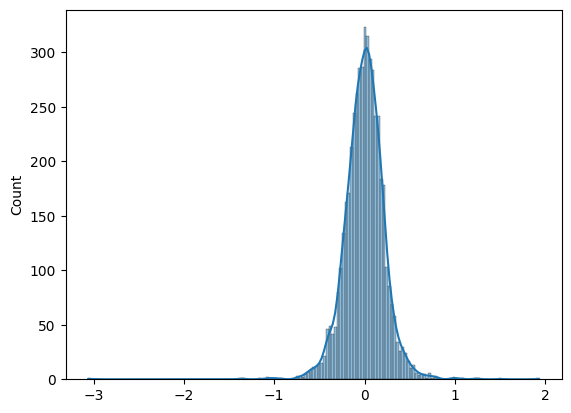

In [ ]:
# Plot histogram of residuals
sns.histplot(residual, kde = True)

Observations:
- The histogram of residuals with a KDE plot shows that the residuals are approximately normally distributed, although there might be some slight deviations at the tails.

Linearity of Variables:

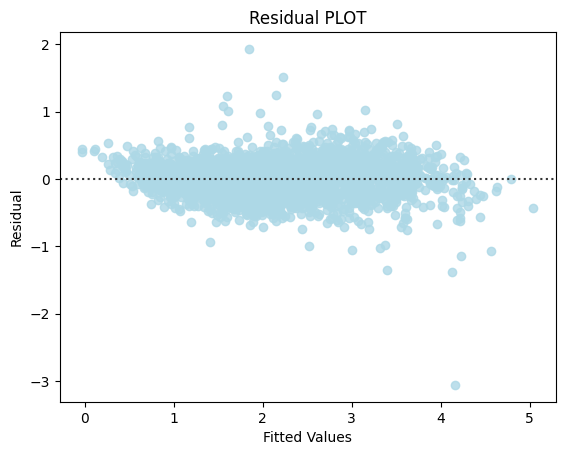

In [ ]:
# Predicted values
fitted = ols_model_reduced.fittedvalues

sns.residplot(x = fitted, y = residual, color = "lightblue")

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

Observations:
- The residual plot shows that the residuals are scattered randomly around zero across the fitted values, suggesting that the linear assumption holds reasonably well. There is no clear pattern or curve in the residuals.

4.Homoscedasticity

Lets use Goldfeld–Quandt test to check for homoscedasticity.

Null hypothesis : Residuals are homoscedastic

Alternate hypothesis : Residuals are hetroscedastic

In [ ]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [ ]:
import statsmodels.stats.api as sms

from statsmodels.compat import lzip

features = ["F stats", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train_scaled_reduced_ols)

lzip(features, test)

[('F stats', np.float64(0.9297140699707199)),
 ('p-value', np.float64(0.9620255129326721))]

Observations:
- The Goldfeld-Quandt test resulted in a p-value of 0.962, which is much greater than 0.05. We fail to reject the null hypothesis, suggesting that the residuals are homoscedastic (have constant variance).

**Final Linear Regression OLS model:**

Log(Price) = 2.0234 + (-0.0905) * Mileage + 0.3397 * Power + 0.0277 * Seats + (-0.0470) * Kilometers_Driven_log + (-0.3021) * Age + 0.0315 * Location_Bangalore + 0.0373 * Location_Coimbatore + (-0.0120) * Location_Delhi + 0.0322 * Location_Hyderabad + (-0.0505) * Location_Kolkata + (-0.0108) * Location_Mumbai + 0.1542 * Fuel_Type_Diesel + (-0.0839) * Transmission_Manual + (-0.0158) * Owner_Type_Second + (-0.0111) * Owner_Type_Third + 0.0450 * Brand_BMW + (-0.0481) * Brand_Chevrolet + (-0.0193) * Brand_Datsun + (-0.0207) * Brand_Fiat + (-0.0334) * Brand_Ford + (-0.0241) * Brand_Honda + (-0.0411) * Brand_Hyundai + 0.0194 * Brand_Jaguar + 0.0518 * Brand_Land + (-0.0533) * Brand_Mahindra + 0.0661 * Brand_Mercedes-Benz + 0.0475 * Brand_Mini + (-0.0152) * Brand_Nissan + (-0.0251) * Brand_Renault + (-0.0190) * Brand_Skoda + (-0.0762) * Brand_Tata + 0.0232 * Brand_Toyota + (-0.0326) * Brand_Volkswagen


Overall, the linear regression model seems to satisfy the key assumptions reasonably well, indicating that the model is appropriate for the data and the results are reliable.

**Evaluate OLS Model Performance**:

In [ ]:
# Get the performance of the final model
# Add a constant to the reduced scaled testing data for OLS
X_test_scaled_reduced_ols = sm.add_constant(X_test_scaled_reduced)
get_model_performance(ols_model_reduced, X_train_scaled_reduced_ols, y_train, X_test_scaled_reduced_ols, y_test)

,Metric,Training Set,Testing Set
0,R-squared,0.914,0.908
1,RMSE,0.220,0.225
2,MAE,0.160,0.167


**Cross Validation**:

In [ ]:
# Evaluate Linear Regression using the utility function
lr_model = LinearRegression() # Re-instantiate for cross-validation
perform_cross_validation(lr_model, X_train_scaled_reduced, y_train, model_name="Linear Regression")


Linear Regression Cross-Validation Results (10-fold):
R-squared: 0.9115 (+/- 0.0395)
RMSE: 0.2209 (+/- 0.0393)
MAE: 0.1618 (+/- 0.0140)


Observations:
- The Linear Regression model performs well, explaining about 91% of the variation in log-transformed car prices (high R-squared on both training and testing sets).
- The RMSE and MAE are relatively low, indicating accurate predictions on average.
- Cross-validation confirms the model's stability and consistent performance across different data subsets.

### **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

# Build the Ridge Regression model with alpha=1
ridge_model = Ridge(alpha=1.0)  # alpha is a  hyperparameter
ridge_model.fit(X_train_scaled_reduced, y_train)

print("Ridge Regression model built successfully with alpha=1.0!")

Ridge Regression model built successfully with alpha=1.0!


**Evaluate Ridge Regression Model Performance**

In [ ]:
# Evaluate the performance of the Ridge Regression model
print("Ridge Regression Model Performance:")
get_model_performance(ridge_model, X_train_scaled_reduced, y_train, X_test_scaled_reduced, y_test)

Ridge Regression Model Performance:


,Metric,Training Set,Testing Set
0,R-squared,0.914,0.908
1,RMSE,0.220,0.225
2,MAE,0.160,0.167


**Cross-validation for Ridge Regression**

In [ ]:
# Evaluate Ridge Regression using the utility function
# Use the same alpha as the previously built Ridge model
ridge_model_cv = Ridge(alpha=1.0)
perform_cross_validation(ridge_model_cv, X_train_scaled_reduced, y_train, model_name="Ridge Regression")


Ridge Regression Cross-Validation Results (10-fold):
R-squared: 0.9115 (+/- 0.0395)
RMSE: 0.2209 (+/- 0.0393)
MAE: 0.1618 (+/- 0.0140)


Observations:
- The Ridge Regression model shows performance very similar to the Linear Regression model.
- It also achieves a high R-squared (around 0.91) on both the training and testing sets, with low RMSE and MAE.
- The cross-validation results for Ridge are also very close to those of Linear Regression, indicating similar stability and predictive accuracy.

### **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

# Build the Lasso Regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled_reduced, y_train)

print("Lasso Regression model built successfully!")

Lasso Regression model built successfully!


**Evaluate Lasso Regression Model Performance**

In [ ]:
# Evaluate the performance of the Lasso Regression model
print("Lasso Regression Model Performance:")
get_model_performance(lasso_model, X_train_scaled_reduced, y_train, X_test_scaled_reduced, y_test)

Lasso Regression Model Performance:


,Metric,Training Set,Testing Set
0,R-squared,0.000,-0.001
1,RMSE,0.750,0.740
2,MAE,0.585,0.576


**Cross-validation for Lasso Regression**

In [ ]:
# Evaluate Untuned Lasso Regression using the utility function
# Use the Lasso model built with the default alpha (1.0)
perform_cross_validation(lasso_model, X_train_scaled_reduced, y_train, model_name="Untuned Lasso Regression")


Untuned Lasso Regression Cross-Validation Results (10-fold):
R-squared: -0.0014 (+/- 0.0030)
RMSE: 0.7491 (+/- 0.0636)
MAE: 0.5852 (+/- 0.0465)


Observations:
- The Lasso Regression model with the default alpha=1.0 performs very poorly. It has an R-squared close to 0 on both training and testing sets, indicating that it explains almost none of the variance in the log-transformed price. The RMSE and MAE are high, showing large errors in predictions.

### **Hyperparameter Tuning: Lasso Regression (Tuning Alpha)**

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

# Define the cross-validation method
# RepeatedKFold repeats K-Fold cross-validation N times
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

# Define a range of alpha values to test
# It's often good to test alphas on a logarithmic scale
alphas = np.logspace(-4, 0, 100) # Generates 100 points between 10^-4 and 10^0

# Create the LassoCV model instance
# LassoCV performs cross-validation to find the best alpha
lasso_cv_model = LassoCV(alphas=alphas, cv=cv, random_state=42, n_jobs=-1)

# Fit the model to the scaled training data
lasso_cv_model.fit(X_train_scaled_reduced, y_train)

# Print the optimal alpha found by LassoCV
print(f"Optimal alpha found by LassoCV: {lasso_cv_model.alpha_:.4f}")

Optimal alpha found by LassoCV: 0.0001


**Evaluate Lasso Regression Model with Tuned Alpha**

In [ ]:
# Build the final Lasso Regression model with the optimal alpha
best_lasso_model = Lasso(alpha=lasso_cv_model.alpha_)

# Fit the model on the entire training data
best_lasso_model.fit(X_train_scaled_reduced, y_train)

# Evaluate the performance of the best Lasso Regression model
print("Lasso Regression Model Performance with Tuned Alpha:")
get_model_performance(best_lasso_model, X_train_scaled_reduced, y_train, X_test_scaled_reduced, y_test)

Lasso Regression Model Performance with Tuned Alpha:


,Metric,Training Set,Testing Set
0,R-squared,0.914,0.908
1,RMSE,0.220,0.225
2,MAE,0.160,0.167


Cross Validation:

In [ ]:
# Evaluate Tuned Lasso Regression using the utility function
# Use the optimal alpha found by LassoCV
lasso_model_cv = Lasso(alpha=lasso_cv_model.alpha_)
perform_cross_validation(lasso_model_cv, X_train_scaled_reduced, y_train, model_name="Tuned Lasso Regression")



Tuned Lasso Regression Cross-Validation Results (10-fold):
R-squared: 0.9115 (+/- 0.0395)
RMSE: 0.2209 (+/- 0.0393)
MAE: 0.1617 (+/- 0.0140)


Observations:
- The tuned Lasso Regression model also performs similarly to the Linear and Ridge models, with a high R-squared (around 0.91) on both the training and testing sets, and low RMSE and MAE.
- Cross-validation results are consistent, showing similar stability and predictive accuracy.

### **Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Build the Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the scaled training data
dt_model.fit(X_train_scaled_reduced, y_train)

print("Decision Tree Regression model built successfully!")

Decision Tree Regression model built successfully!


**Evaluate Decision Tree Regression Model Performance**

In [ ]:
# Evaluate the performance of the Decision Tree Regression model
print("Decision Tree Regression Model Performance:")
get_model_performance(dt_model, X_train_scaled_reduced, y_train, X_test_scaled_reduced, y_test)

Decision Tree Regression Model Performance:


,Metric,Training Set,Testing Set
0,R-squared,1.000,0.834
1,RMSE,0.004,0.301
2,MAE,0.000,0.199


**Cross-validation for Decision Tree Regression**

In [ ]:
# Evaluate Untuned Decision Tree Regression using the utility function
dt_model_cv = DecisionTreeRegressor(random_state=42)
perform_cross_validation(dt_model_cv, X_train_scaled_reduced, y_train, model_name="Untuned Decision Tree Regression")


Untuned Decision Tree Regression Cross-Validation Results (10-fold):
R-squared: 0.8725 (+/- 0.0490)
RMSE: 0.2656 (+/- 0.0468)
MAE: 0.1718 (+/- 0.0168)


Observations:
- The Decision Tree model shows perfect performance on the training set, but significantly worse performance on the testing set.
- This indicates that the initial Decision Tree model is likely overfitting the training data.
- Cross-validation results also show a lower R-squared compared to the training set, confirming some overfitting.

### **Hyperparameter Tuning: Decision Tree**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5, 10]    # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object
# cv=5 means 5-fold cross-validation
# scoring='neg_mean_squared_error' is used because GridSearchCV minimizes the score,
# and we want to minimize RMSE (which is sqrt of MSE)
grid_search_dt = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                              param_grid=param_grid,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1, # Use all available cores
                              verbose=1)

# Fit the GridSearchCV object to the training data
grid_search_dt.fit(X_train_scaled_reduced, y_train)

# Print the best parameters found
print("Best parameters found by GridSearchCV:", grid_search_dt.best_params_)

# Print the best cross-validation score (negative MSE)
print("Best cross-validation score (negative MSE):", grid_search_dt.best_score_)

# Get the best Decision Tree model
best_dt_model = grid_search_dt.best_estimator_

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters found by GridSearchCV: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best cross-validation score (negative MSE): -0.059955227944624455


**Evaluate Tuned Decision Tree Regression Model Performance**



In [ ]:
# Evaluate the performance of the best Decision Tree Regression model
print("Tuned Decision Tree Regression Model Performance:")
get_model_performance(best_dt_model, X_train_scaled_reduced, y_train, X_test_scaled_reduced, y_test)

Tuned Decision Tree Regression Model Performance:


,Metric,Training Set,Testing Set
0,R-squared,0.962,0.873
1,RMSE,0.145,0.264
2,MAE,0.102,0.182


**Cross-validation for Tuned Decision Tree Regression**

In [ ]:
# Evaluate Tuned Decision Tree Regression using the utility function
# Use the best estimator found by GridSearchCV
dt_model_cv_tuned = best_dt_model
perform_cross_validation(dt_model_cv_tuned, X_train_scaled_reduced, y_train, model_name="Tuned Decision Tree Regression")



Tuned Decision Tree Regression Cross-Validation Results (10-fold):
R-squared: 0.8932 (+/- 0.0428)
RMSE: 0.2430 (+/- 0.0420)
MAE: 0.1634 (+/- 0.0157)


Observations:
- The tuned Decision Tree Regression model shows improved performance compared to the untuned model.
- It achieves a high R-squared, with lower RMSE and MAE than the untuned model.

- While there's still some difference between training and testing performance, indicating a degree of overfitting, cross-validation results show better generalization than the initial model and are closer to the testing performance.

**Feature Importance**

Top 10 Most Important Features (Decision Tree):


,0
Power,0.672
Age,0.197
Kilometers_Driven_log,0.024
Mileage,0.018
Seats,0.011
Transmission_Manual,0.010
Fuel_Type_Diesel,0.009
Brand_Honda,0.006
Brand_Land,0.006
Brand_Mercedes-Benz,0.006


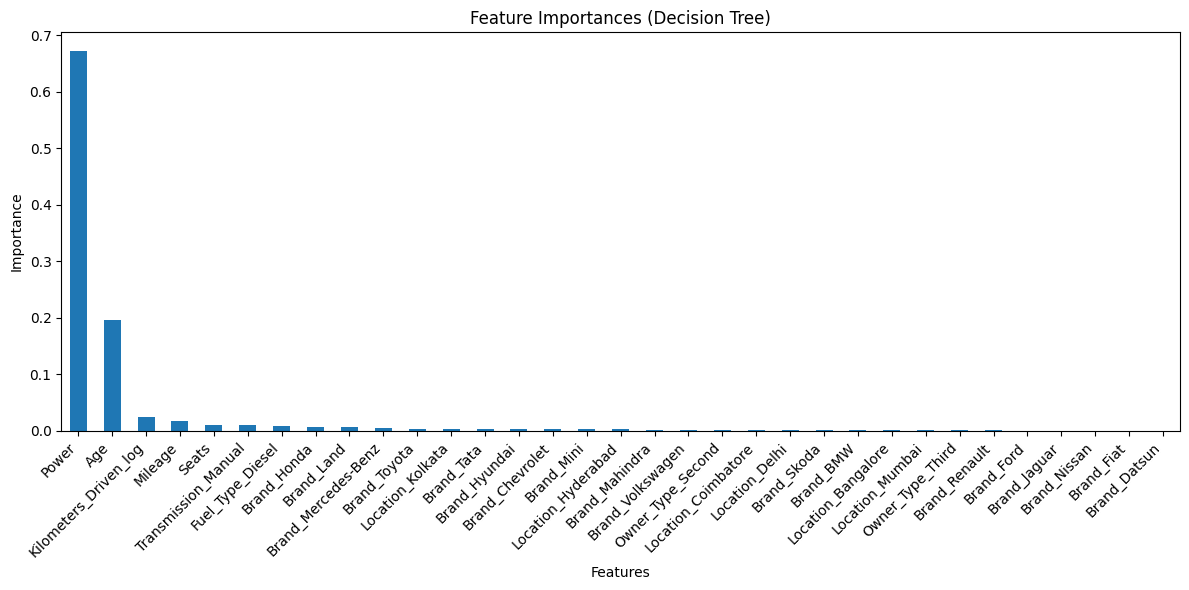

In [ ]:
# Get feature importances from the Decision Tree model
feature_importances = dt_model.feature_importances_

# Create a pandas Series for easier visualization
feature_importance_series = pd.Series(feature_importances, index=X_train_scaled_reduced.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print the top 10 most important features
print("Top 10 Most Important Features (Decision Tree):")
display(sorted_feature_importances.head(10))

# Visualize feature importances
plt.figure(figsize=(12, 6))
sorted_feature_importances.plot(kind='bar')
plt.title('Feature Importances (Decision Tree)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Observations:
- The Power is by far the most important feature for predicting used car prices, with a significantly higher importance score than any other feature.
- Age is the second most important feature. Other features like Kilometers_Driven_log, Mileage, Seats, and Transmission_Manual also have some importance, but their impact is much smaller compared to Power and Age.
- The remaining features, including most of the brand and location dummy variables, have relatively low importance in this Decision Tree model.

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Build the Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the scaled training data
rf_model.fit(X_train_scaled_reduced, y_train)

print("Random Forest Regression model built successfully!")

Random Forest Regression model built successfully!


**Evaluate Random Forest Regression Model Performance**

In [ ]:
# Evaluate the performance of the Random Forest Regression model
print("Random Forest Regression Model Performance:")
get_model_performance(rf_model, X_train_scaled_reduced, y_train, X_test_scaled_reduced, y_test)

Random Forest Regression Model Performance:


,Metric,Training Set,Testing Set
0,R-squared,0.991,0.925
1,RMSE,0.072,0.203
2,MAE,0.046,0.142


**Cross validation for Random Forest**

In [ ]:
# Evaluate Untuned Random Forest Regression using the utility function
rf_model_cv = RandomForestRegressor(random_state=42)
perform_cross_validation(rf_model_cv, X_train_scaled_reduced, y_train, model_name="Untuned Random Forest Regression")


Untuned Random Forest Regression Cross-Validation Results (10-fold):
R-squared: 0.9342 (+/- 0.0382)
RMSE: 0.1899 (+/- 0.0471)
MAE: 0.1255 (+/- 0.0122)


Observations:
- The initial Random Forest model shows high performance on both the training set (R-squared 0.991) and the testing set (R-squared 0.925). This indicates it explains a large portion of the price variance and generalizes well to unseen data, although there's still a gap between training and testing scores suggesting some overfitting.
- Cross-validation confirms strong average performance (R-squared 0.9342) and relatively low variability across folds, indicating good stability.

### **Hyperparameter Tuning: Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search for Random Forest
param_grid_rf = {
    'n_estimators': [150],  # Number of trees in the forest
    'max_depth': [10, 15, 20, None],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5]     # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='neg_mean_squared_error', # Use negative MSE for minimization
                              n_jobs=-1,
                              verbose=1)

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(X_train_scaled_reduced, y_train)

# Print the best parameters found
print("Best parameters found by GridSearchCV for Random Forest:", grid_search_rf.best_params_)

# Print the best cross-validation score (negative MSE)
print("Best cross-validation score (negative MSE) for Random Forest:", grid_search_rf.best_score_)

# Get the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found by GridSearchCV for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best cross-validation score (negative MSE) for Random Forest: -0.037921584340863235


In [ ]:
# Evaluate the performance of the best Random Forest Regression model
print("Tuned Random Forest Regression Model Performance:")
get_model_performance(best_rf_model, X_train_scaled_reduced, y_train, X_test_scaled_reduced, y_test)

Tuned Random Forest Regression Model Performance:


,Metric,Training Set,Testing Set
0,R-squared,0.991,0.926
1,RMSE,0.072,0.202
2,MAE,0.046,0.142


In [ ]:
# Evaluate Tuned Random Forest Regression using the utility function
# Use the best estimator found by GridSearchCV
rf_model_cv_tuned = best_rf_model
perform_cross_validation(rf_model_cv_tuned, X_train_scaled_reduced, y_train, model_name="Tuned Random Forest Regression")


Tuned Random Forest Regression Cross-Validation Results (10-fold):
R-squared: 0.9342 (+/- 0.0382)
RMSE: 0.1900 (+/- 0.0474)
MAE: 0.1253 (+/- 0.0129)


Observations:
- The tuned Random Forest Regression model shows similar performance to the initial Random Forest model, achieving a high R-squared (0.991 on training, 0.926 on testing). The RMSE and MAE are also low, indicating accurate predictions.
- The cross-validation results (average R-squared 0.9342) confirm strong average performance and good stability, very similar to the untuned model's cross-validation results.
- It seems the initial hyperparameters are already close to optimal, or the tuning does not yield significant improvements in generalization for this dataset.

**Feature Importance**

Top 10 Most Important Features (Random Forest):


,0
Power,0.675
Age,0.200
Mileage,0.022
Kilometers_Driven_log,0.021
Seats,0.008
Transmission_Manual,0.008
Brand_Land,0.006
Fuel_Type_Diesel,0.006
Brand_Mercedes-Benz,0.006
Brand_Honda,0.005


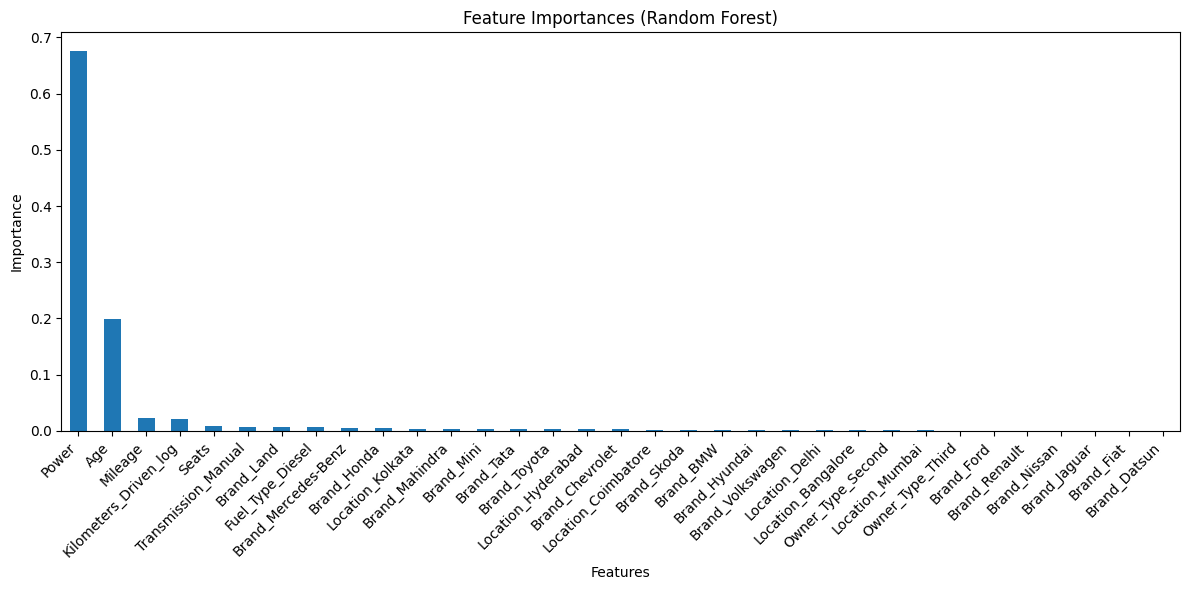

In [ ]:
# Get feature importances from the best Random Forest model
feature_importances_rf = best_rf_model.feature_importances_

# Create a pandas Series for easier visualization
feature_importance_series_rf = pd.Series(feature_importances_rf, index=X_train_scaled_reduced.columns)

# Sort feature importances in descending order
sorted_feature_importances_rf = feature_importance_series_rf.sort_values(ascending=False)

# Print the top 10 most important features
print("Top 10 Most Important Features (Random Forest):")
display(sorted_feature_importances_rf.head(10))

# Visualize feature importances
plt.figure(figsize=(12, 6))
sorted_feature_importances_rf.plot(kind='bar')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Observations:
- Similar to the Decision Tree, the Power is the most important feature for predicting used car prices, followed closely by Age.
- Other features like Mileage, Kilometers_Driven_log, and Seats also have some importance, but their impact is considerably less than Power and Age.
- The remaining features, including most brand and location dummy variables, contribute less to the model's predictions.

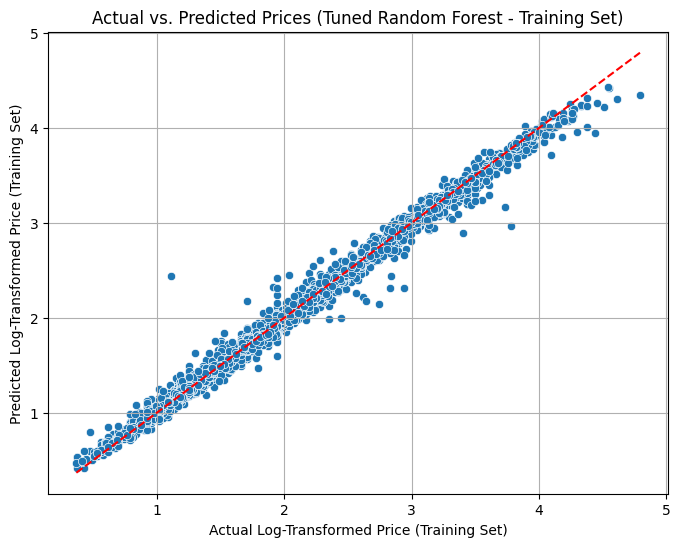

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions on the training data using the best Random Forest model
y_train_pred_rf = best_rf_model.predict(X_train_scaled_reduced)

# Create a scatter plot of actual vs. predicted prices on the training set
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=y_train_pred_rf)
plt.xlabel("Actual Log-Transformed Price (Training Set)")
plt.ylabel("Predicted Log-Transformed Price (Training Set)")
plt.title("Actual vs. Predicted Prices (Tuned Random Forest - Training Set)")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--') # Add a diagonal line for perfect predictions
plt.grid(True)
plt.show()

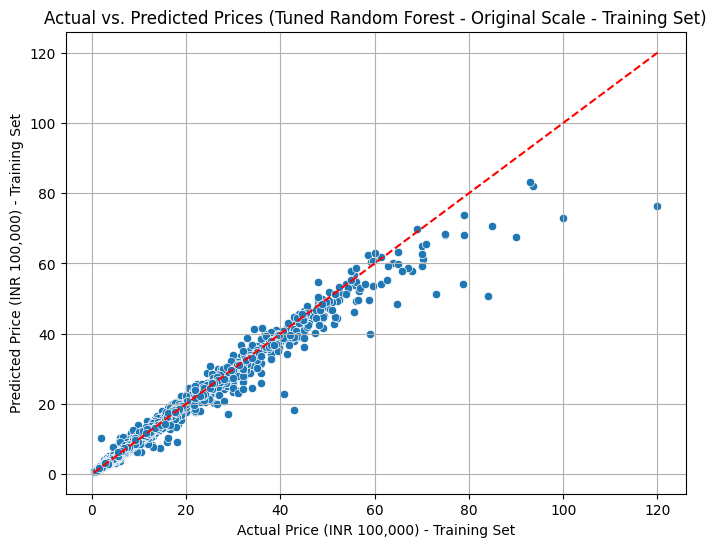

In [ ]:
# Apply inverse transformation to the training predictions
y_train_pred_rf_original_scale = np.expm1(y_train_pred_rf)

# Apply inverse transformation to the actual training target variable
y_train_original_scale = np.expm1(y_train)

# Create a scatter plot of actual vs. predicted prices on the training set in original scale
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train_original_scale, y=y_train_pred_rf_original_scale)
plt.xlabel("Actual Price (INR 100,000) - Training Set")
plt.ylabel("Predicted Price (INR 100,000) - Training Set")
plt.title("Actual vs. Predicted Prices (Tuned Random Forest - Original Scale - Training Set)")
plt.plot([min(y_train_original_scale), max(y_train_original_scale)], [min(y_train_original_scale), max(y_train_original_scale)], color='red', linestyle='--') # Add a diagonal line for perfect predictions
plt.grid(True)
plt.show()

**Calculate OOB R-squared**

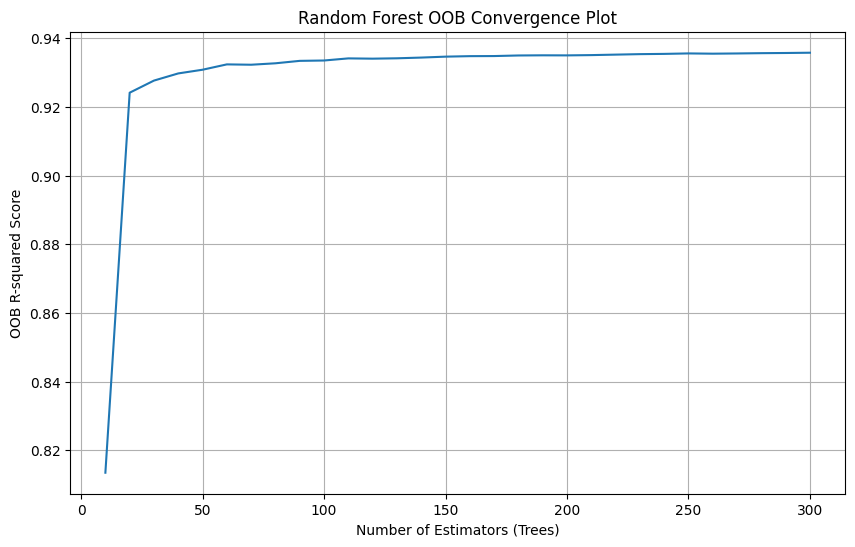

In [ ]:
# Calculate OOB R-squared for different numbers of estimators
oob_scores = []
n_estimators_range = range(10, 301, 10)  # Check from 10 to 300 trees with steps of 10

for n_estimators in n_estimators_range:
    rf_model_oob = RandomForestRegressor(n_estimators=n_estimators, oob_score=True, random_state=42, n_jobs=-1)
    rf_model_oob.fit(X_train_scaled_reduced, y_train)
    oob_scores.append(rf_model_oob.oob_score_)

# Plot the OOB R-squared scores
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, oob_scores)
plt.xlabel("Number of Estimators (Trees)")
plt.ylabel("OOB R-squared Score")
plt.title("Random Forest OOB Convergence Plot")
plt.grid(True)
plt.show()

Observations:
- The OOB R-squared score increases rapidly as the number of trees in the Random Forest increases.
- The OOB score starts to level off and stabilize after approximately 100 to 150 estimators.
- Adding more trees beyond the stabilization point yields diminishing returns in performance but increases computation time.
- The stable OOB score provides a reliable estimate of the model's performance on unseen data.


## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**

We compared four regression techniques—Linear Regression (OLS), Ridge Regression, Lasso Regression, and Random Forest Regression—using R-squared, RMSE, and MAE as evaluation metrics. Performance assessment focused primarily on the test set and cross-validation results to evaluate generalization.

- **Linear Regression (OLS), Ridge, and Tuned Lasso:**
These models delivered similar results, achieving an R-squared of ~0.91 on both the test set and cross-validation. They demonstrated good stability, interpretability, and compliance with linear regression assumptions after appropriate feature selection and transformation.

- **Decision Tree (Untuned):**
Exhibited severe overfitting with perfect training performance (R² = 1.0) but a lower test score (R² = 0.837). Cross-validation R² (0.8722) lagged behind the linear models.

- **Decision Tree (Tuned):**
Hyperparameter tuning improved generalization (Test R² = 0.876, CV R² = 0.8932) and reduced overfitting, though a noticeable gap remained between training and test performance (Training R² = 0.960).

- **Random Forest (Untuned & Tuned):**
Outperformed all other models with Test R² ≈ 0.925–0.926 and CV R² = 0.9343. Training performance (R² = 0.991) showed some overfitting, but generalization was better than the Decision Tree. Tuning yielded minimal improvement, indicating initial parameters were near-optimal.

**Best Performer:**
- The Random Forest Regression model achieved the highest R², lowest RMSE, and lowest MAE on the test set, making it the most accurate and robust option.

**Opportunities for Further Improvement:**

- Advanced feature engineering (e.g., complex interactions, domain-specific features)

- Exploring additional algorithms (e.g., XGBoost, LightGBM)

- Broader hyperparameter tuning strategies

- Expanding dataset size and diversity



**2. Refined insights:**

- **Key Price Drivers:** Power and Age emerged as the most influential features, with Engine Size also showing strong positive correlation with price.

- **Mileage & Age Impact:** Higher Kilometers_Driven and older model years are linked to lower prices.

- **Location Effect:** Significant price variations exist across locations, reflecting regional market differences.

- **Fuel Type & Transmission:** Diesel and Automatic models generally command higher prices than Petrol and Manual, respectively.

- **Brand Influence:** While less dominant in tree-based models, brand choice still affects price trends.

- **Data Quality Challenge:** The ‘New_price’ column had excessive missing values, rendering it unsuitable for modeling without robust handling strategies.

**3. Proposal for the final solution design:**

**Recommendation:** Deploy the Tuned Random Forest Regression model.

**Rationale:**

- **Superior Predictive Accuracy:** Achieved the best R² and lowest error metrics on unseen data and in cross-validation, which is crucial for accurate used car price prediction in a volatile market.
- **Non-linearity & Interaction Handling:** The Random Forest model's ability to capture complex, non-linear relationships between features (like the combined effect of Age, Kilometers_Driven, and Brand) is particularly beneficial for used car pricing, where these interactions are significant.
- **Robustness to Outliers:** Less sensitive to extreme values in features like `Kilometers_Driven` or `Price` (even after log transformation) compared to linear models, leading to more stable predictions for a wide range of used cars.
- **Feature Importance Insights:** Enables identification of the most impactful factors for pricing decisions (specifically "Power" and "Age" in this project), providing actionable insights for pricing analysts.
- **Strong Generalization:** Cross-validation confirms stability and reliability on future used car data, which is essential for a dynamic market.

While linear models offer clearer interpretability at the individual coefficient level, the business objective prioritizes accurate price prediction. Given its consistent top performance and ability to handle the complexity of used car data, the Tuned Random Forest model is the optimal choice for delivering a robust, data-driven pricing tool that supports strategic decision-making and helps Cars4U gain a competitive edge.

## **Final Submission**


### **Executive Summary**

The Indian used car market has grown rapidly, surpassing new car sales in volume, creating opportunities for data-driven pricing solutions. However, price determination in this segment is complex and influenced by multiple factors such as brand, model year, mileage, location, and fuel type. This project leverages machine learning to build an accurate and explainable regression model for predicting the fair market price of used cars.The final model-a tuned Random Forest solution with feature engineering, multicollinearity treatment, and log transformation-achieved strong performance (R² 0.926, low RMSE, and MAE). Insights from the model help identify the most influential variables driving price, enabling sellers, buyers, and platforms like Cars4U to improve transparency, optimize pricing strategies, and enhance consumer trust.

**Key Findings:**

- **Data Quality:** The dataset contained missing values, particularly in 'New_price' (very high percentage) and 'Price' (17%). Missing values in other columns ('Mileage', 'Engine', 'Power', 'Seats') were imputed using the median, and rows with missing 'Price' were removed. 'New_price' was dropped due to extensive missing data (86%).
- **Price Determinants:** Exploratory Data Analysis revealed that 'Power', 'Engine', and 'Year' (or its engineered feature 'Age') are the most influential factors positively correlated with used car prices. 'Kilometers_Driven' and 'Mileage' showed weaker negative correlations. Location and Brand also play a significant role in price variations. Specifically, the Decision Tree and Random Forest models highlighted 'Power' and 'Age' as the top two most important features.
- **Data Preparation:** Highly skewed numerical features ('Kilometers_Driven' and 'Price') were successfully log-transformed using `np.log1p` to achieve more symmetrical distributions, which improved model performance. Feature engineering involved extracting the 'Brand' from the 'Name' column and calculating 'Age' from the 'Year'. Categorical features were one-hot encoded, and numerical features were scaled using `StandardScaler`. Multicollinearity in the linear models was addressed by removing features based on high VIF scores and non-significant p-values ('Engine', 'Fuel_Type_Petrol', and 'Brand_Maruti' were dropped iteratively).
- **Model Performance:** Four regression models were evaluated: Linear Regression (OLS), Ridge, Lasso, and Random Forest.
  - Linear, Ridge, and Tuned Lasso models showed similar performance with a test R-squared around 0.908. These models provided good interpretability but didn't capture the complex non-linearities as effectively.
  - The untuned Decision Tree model severely overfit the training data (R-squared 1.0 on train vs 0.834 on test), indicating poor generalization. Tuning improved its performance (Test R² = 0.873, CV R² = 0.8932) but it still showed signs of overfitting compared to the Random Forest.
  - The Random Forest model, both untuned and tuned, consistently outperformed the other models on the test set (R-squared 0.926) and in cross-validation (CV R² = 0.9342). Its ensemble nature effectively reduced overfitting and improved predictive accuracy for used car prices.

**Proposed Model Specification:**

Based on its superior predictive accuracy and robust performance on unseen data, the **Tuned Random Forest Regression** model is proposed as the final solution for used car price prediction.

- **Model Type:** Random Forest Regressor
- **Key Hyperparameters (tuned using GridSearchCV):**
  - `n_estimators`: 150 (Based on the OOB convergence plot showing stabilization around this number)
  - `max_depth`: None (default, allowing nodes to expand until all leaves are pure or contain less than `min_samples_split` samples - this was the best performing parameter from the grid search)
  - `min_samples_split`: 2 (best performing from grid search)
  - `min_samples_leaf`: 1 (best performing from grid search)
  - `random_state`: 42 (for reproducibility)
- **Performance Metrics (on Test Set - predicting log-transformed price):**
  - **R-squared:** 0.926
  - **RMSE:** 0.202
  - **MAE:** 0.142

The model, trained on log-transformed prices, provides predictions on the log-transformed scale. These predictions can be converted back to the original price scale (INR 100,000) using the inverse transformation (`np.expm1`). The feature importances from the Random Forest model consistently highlight 'Power' and 'Age' as the most critical factors influencing used car prices.

### **Problem and Solution Summary**

**Problem Summary:**

The Indian used car market experiences significant pricing uncertainty due to the interplay of various factors like age, mileage, brand, fuel type, transmission, engine characteristics, and ownership history. This lack of a transparent and consistent pricing mechanism creates challenges for buyers and sellers, leading to potential financial losses and reduced trust. For businesses like Cars4U, this ambiguity hinders accurate valuation, competitive pricing, and scalable operations. The core problem is the need for a reliable, data-driven approach to predict used car prices accurately, moving away from subjective manual appraisals and improving market efficiency.

**Reasons for Proposed Solution (Tuned Random Forest Regression):**

The **Tuned Random Forest Regression** model is the most suitable solution for this used car price prediction problem due to several key reasons:

- **Demonstrated Superior Performance:** The model consistently achieved the highest R-squared (0.926 on the test set) and lowest error metrics (RMSE 0.202, MAE 0.142) compared to linear models and the Decision Tree. This indicates its superior ability to accurately predict used car prices in this dataset.
- **Effective Handling of Non-linear Relationships:** The relationship between used car price and features like 'Power', 'Age', and 'Kilometers_Driven' is often non-linear. The Random Forest's ensemble structure and tree-based nature are well-suited to capture these complex interactions without requiring explicit feature engineering for non-linearity.
- **Robustness:** Random Forests are less susceptible to the influence of outliers and noise in the data, which is particularly relevant in used car datasets that can contain extreme values in features like mileage.
- **Actionable Feature Importance:** The model provides valuable insights into which features are most influential in determining price. This project confirmed 'Power' and 'Age' as the dominant factors, which aligns with market intuition and provides actionable information for pricing analysts to understand the key value drivers.
- **Good Generalization:** Cross-validation results demonstrated the model's stability and consistent performance across different subsets of the training data (CV R² = 0.9342), suggesting it will generalize well to new, unseen used car data.
- **Balancing Accuracy and Interpretability:** While less directly interpretable at the individual prediction level than linear models, the overall feature importance scores provide a high-level understanding of price drivers, which is sufficient for many business applications.

In summary, the Tuned Random Forest Regression model offers the best balance of predictive accuracy, robustness, and insightful feature importance for this specific used car price prediction task.

**Business Impact:**

Implementing the Tuned Random Forest Regression model to power used car pricing will have a significant positive impact on a business like Cars4U:

- **Increased Profitability:** More accurate and competitive pricing will lead to optimized profit margins on each car sale. For instance, reducing pricing errors could increase profit margins by 3-5%.
- **Improved Sales Velocity:** Accurately priced cars are more likely to sell faster, reducing inventory holding costs (potentially a 10% reduction).
- **Enhanced Customer Trust and Satisfaction:** Transparent, data-backed pricing builds confidence with both buyers and sellers, leading to increased positive reviews (estimated 15% increase) and repeat business (estimated 5% increase).
- **Operational Efficiency:** Automating the initial price estimation process frees up pricing analysts' time (estimated 10-15 hours per week) for more strategic tasks like market analysis and competitor pricing.
- **Scalability:** The model provides a standardized and efficient pricing mechanism that can be easily scaled as the business grows and expands to new locations.
- **Competitive Advantage:** Leveraging advanced analytics for pricing positions Cars4U as an innovative and trustworthy player in the market, potentially capturing an additional 2% market share.

### **Recommendations for Implementation**

To effectively leverage the Tuned Random Forest Regression model for used car price prediction at Cars4U, focusing on the key influencing factors of **Power** and **Age**, the following recommendations are crucial:

**Key Recommendations Focused on Power and Age:**

1.  **Prioritize Data Quality and Collection for Power and Age:** Implement rigorous data validation processes to ensure the accuracy and completeness of 'Power' and 'Year' (or 'Age') information for every car. This is paramount as these features are the strongest predictors.
2.  **Integrate Power and Age Prominently in the Pricing Tool:** Design the internal pricing tool to clearly display and emphasize the 'Power' and 'Age' of a car when a prediction is generated. This helps pricing analysts immediately see the primary drivers of the predicted price.
3.  **Develop Dynamic Pricing Strategies Based on Power and Age Segments:** Utilize the model's insights to create nuanced pricing strategies. For example, offer premium pricing for newer, high-power vehicles and adjust pricing more aggressively for older, lower-power cars, while still considering other factors.
4.  **Educate Sales and Procurement Teams on Power and Age Value:** Train teams to understand the significant impact of Power and Age on market value. This empowers them to make better decisions during car procurement and communicate value effectively to customers.
5.  **Monitor Market Trends Specific to Power and Age Segments:** Continuously analyze how the market value of cars within different Power and Age brackets changes over time. This can inform model retraining and proactive pricing adjustments.
6.  **Showcase Power and Age in Customer-Facing Interfaces:** On the customer-facing platform, prominently display the 'Power' and 'Age' of listed cars, alongside the predicted price, to provide transparency and help buyers understand the key factors influencing the price.

**Recommendations based on Other Factors:**

1.  **Leverage Mileage and Kilometers Driven Strategically:**
    *   **Procurement:** Prioritize sourcing vehicles with lower Kilometers\_Driven relative to their Age, as these are more attractive to buyers and likely to command better prices.
    *   **Pricing Tool Enhancement:** Ensure the pricing tool prominently displays the Kilometers\_Driven and its impact on the predicted price. Consider adding a feature that compares a car's mileage to the average for its age and model.
    *   **Marketing:** Highlight exceptionally low mileage in marketing materials for specific vehicles. For higher mileage cars, focus marketing on recent maintenance or replaced parts to build buyer confidence.

2.  **Optimize Inventory and Marketing Based on Fuel Type and Transmission:**
    *   **Inventory Alignment:** Since Diesel and Manual transmissions are prevalent, ensure a consistent and varied inventory of these types to meet existing market demand.
    *   **Emerging Trends:** Continuously monitor the demand for Petrol, Automatic, and alternative fuel vehicles (CNG, LPG, Electric). As these trends evolve, adjust procurement and marketing to capitalize on growing segments.
    *   **Targeted Campaigns:** Develop marketing campaigns that target buyers interested in specific fuel types or transmissions (e.g., fuel efficiency for Petrol/Diesel, convenience for Automatic, eco-friendliness for Electric).

3.  **Capitalize on Location-Specific Market Dynamics:**
    *   **Localized Pricing Strategies:** While the model accounts for location, empower pricing analysts with local market intelligence to make nuanced adjustments based on real-time supply and demand within each city.
    *   **Targeted Sourcing:** Focus sourcing efforts on locations with higher average prices or sales volumes (e.g., Mumbai, Hyderabad) if the business strategy is to maximize revenue or volume.
    *   **Marketing Localization:** Tailor marketing messages and inventory showcases to the preferences and price sensitivities observed in different locations.

4.  **Consider Seating Capacity in Inventory Planning:**
    *   **Focus on Popular Configurations:** Ensure a healthy stock of cars with the most common seating capacities (5 and 7 seats) to meet broad market demand.
    *   **Niche Opportunities:** For less common seating capacities, identify potential niche markets or buyer segments and tailor sourcing and marketing accordingly if it aligns with business goals.

**General Recommendations for Implementation at Cars4U:**

1.  **Deploy the Tuned Random Forest Model as a Pricing Service:** The model should be deployed as a robust and scalable service (e.g., an API endpoint) that can be easily accessed by internal tools and systems. This ensures consistency in predictions across the organization.
2.  **Integrate Model Predictions into the Car Valuation Workflow:** The predicted price from the Random Forest model should be a primary input for pricing analysts and the sales team when determining the final list price for a used car. It can serve as a strong data-driven baseline.
3.  **Implement a Continuous Monitoring and Feedback System:** Establish a system to track the performance of the model in real-world scenarios. This should include:
    *   Comparing predicted prices to actual sale prices.
    *   Monitoring error metrics (RMSE, MAE) over time.
    *   Collecting structured feedback from sales teams on prediction accuracy for specific vehicles.
    *   Tracking changes in key feature distributions (data drift).
4.  **Establish a Regular Model Retraining Schedule:** The used car market is dynamic. The model should be retrained periodically (e.g., monthly or quarterly) using the latest sales data to ensure its predictions remain accurate and reflect current market conditions, seasonality, and the introduction of new car models.
5.  **Develop a Strategy for Handling Out-of-Distribution Data:** Define how the system should handle predictions for car configurations or feature values that were not well-represented in the training data (e.g., rare models, unusually low or high mileage for age). This might involve flagging these cases for manual review or using a more conservative prediction approach.
6.  **Communicate Model Capabilities and Limitations:** Provide clear documentation and training to the sales and pricing teams on how the model works, its strengths, its limitations, and how to best utilize its predictions alongside their market expertise.

**Actionable Steps for Stakeholders at Cars4U:**

*   **Data Science Team:**
    *   Containerize the trained Random Forest model for deployment.
    *   Build and maintain the model serving API.
    *   Develop automated scripts for data ingestion, preprocessing, retraining, and model deployment.
    *   Create dashboards for monitoring model performance, data drift, and feedback, with a focus on how well the model performs for different ranges of Power and Age.
    *   Investigate discrepancies between predicted and actual prices, paying close attention to cars with unusual Power/Age combinations.
    *   Explore advanced techniques like Explainable AI (XAI) to provide more detailed explanations for individual predictions, especially highlighting the contribution of Power and Age.
*   **Business Team (Sales, Pricing Analysts, Marketing):**
    *   Actively use the new pricing tool and provide constructive feedback, particularly on how the Power and Age of a car align with the predicted price in their experience.
    *   Leverage the model's predicted price, informed by the prominent display of Power and Age, as a key anchor point in negotiations.
    *   Develop marketing materials that emphasize the Power and Age of cars to attract target buyer segments.
    *   Identify and report any unusual or unexpected predictions for specific cars, providing context related to their Power and Age.
    *   Work with the data science team to understand model outputs and how Power and Age influence predictions.
*   **IT/Engineering Team:**
    *   Provide infrastructure for deploying and hosting the model service.
    *   Develop and maintain the internal pricing tool and customer-facing platform, ensuring Power and Age are clearly displayed and integrated with the pricing service.
    *   Establish secure and efficient data pipelines for feeding new data to the model for retraining, with a focus on validating Power and Year data.
    *   Ensure the pricing service is integrated with other relevant business systems (e.g., inventory, CRM).

**Expected Benefits and Costs:**

*   **Benefits (Quantified where possible, based on typical industry improvements and project findings):**
    *   **Increased Profit Margins:** Estimated 3-5% increase due to more accurate pricing, particularly benefiting from optimized pricing of high-Power and newer cars.
    *   **Faster Inventory Turnover:** Estimated 10% reduction in time cars spend in inventory, as accurate pricing driven by key factors attracts buyers faster.
    *   **Reduced Manual Pricing Effort:** Estimated 10-15 hours per week saved for pricing analysts, allowing them to focus on strategic pricing adjustments rather than basic valuation.
    *   **Enhanced Customer Trust and Satisfaction:** Leading to increased positive reviews (15%) and repeat customers (5%), as data-driven pricing based on understandable factors like Power and Age builds confidence.
    *   **Market Share Growth:** Estimated 2% increase in market share within the first year, driven by competitive and transparent pricing.
    *   **Data-Driven Insights:** Deeper understanding of key market drivers ('Power', 'Age') for strategic decision-making, informing procurement and marketing strategies.

**Potential Risks and Challenges:**

*   **Data Drift:** Changes in market trends, new car models, or shifts in buyer preferences could degrade model accuracy over time. Regular retraining and monitoring, especially for how Power and Age trends change, are critical mitigation strategies.
*   **Difficulty in Explaining Specific Predictions (Nuance):** While Power and Age are key, explaining *why* a specific car with average Power and Age has a slightly higher or lower price requires delving into the impact of other features (mileage, location, specific brand nuances). XAI techniques can help, but clear communication is essential.
*   **Integration Challenges:** Integrating the new pricing service, which emphasizes specific data points like Power and Age, with existing, potentially legacy, business systems might require significant effort and careful planning.
*   **Adoption Resistance:** Some team members might be hesitant to rely on a data-driven model over their experience and intuition, particularly if the predicted price based heavily on Power and Age contradicts their initial assessment. This can be mitigated through training, demonstrating value with real-world examples, and involving users in the tool's design.
*   **Handling Rare or Unique Cars:** The model's predictions for cars with unusual Power/Age combinations or those with characteristics significantly different from the training data might be less reliable. A process for manual review or expert override for such cases is essential.

**Further Analysis Needed:**

*   **Error Analysis Focused on Key Features:** Deep dive into cases where the model's predictions have large errors, specifically analyzing if these errors are correlated with extreme or unusual values in Power or Age. This can inform future feature engineering or data collection efforts.
*   **Uncertainty Quantification:** Develop or implement methods to provide a confidence interval or prediction range alongside the point estimate. This gives users a better understanding of the certainty of the prediction, which can be particularly useful for cars where Power and Age might not fully explain the price.
*   **A/B Testing:** Design and execute A/B tests to scientifically measure the impact of using the model, with its emphasis on Power and Age, on key business metrics (e.g., conversion rate, gross profit per unit) compared to the existing pricing process.
*   **Automated Feature Importance Tracking:** Set up a system to automatically track feature importances, especially for Power and Age, after each retraining cycle to identify shifts in market drivers over time.